# **PREPARANDO OS DADOS**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df1 = pd.read_csv('/content/CampaignQueue_semicolon.csv', sep=';', encoding='latin-1')
df2 = pd.read_csv('/content/Campaign_semicolon.csv', sep=';', encoding='latin-1')
df3 = pd.read_csv('/content/Customer_semicolon.csv', sep=';', encoding='latin-1')
df4 = pd.read_csv('/content/Order_semicolon.csv', sep=';', encoding='latin-1')

# Tarefa
Analisar o impacto das campanhas nas vendas dentro de uma janela de 7 dias após o envio da campanha, relacionando os dados de "df1" (CampaignQueue), "df3" (Customer) e "df4" (Order).

## Preparar os dataframes

### Subtarefa:
Garantir que as colunas de data nos DataFrames `df1`, `df3` e `df4` estejam no formato datetime e que as colunas de ID relevantes (`customer_Id`, `campaignId`, etc.) estejam prontas para junção.


**Raciocínio**:

Converter as colunas de data para o formato datetime e verificar a compatibilidade das colunas de ID em df1, df3 e df4, conforme as instruções.



In [2]:
# Garantir que as colunas de data estejam em formato datetime e verificar compatibilidade das colunas de ID

# df1 (CampaignQueue)
print("Processando df1 (CampaignQueue):")
date_columns_df1 = ['scheduledAt', 'sendAt', 'createdAt', 'updatedAt']
for col in date_columns_df1:
    if col in df1.columns:
        df1[col] = pd.to_datetime(df1[col], errors='coerce')
        print(f"Convertida a coluna '{col}' em df1 para datetime.")

print("\nVerificando colunas de ID em df1:")
if 'customer_id' in df1.columns:
    if not pd.api.types.is_numeric_dtype(df1['customer_id']):
        df1['customer_id'] = pd.to_numeric(df1['customer_id'], errors='coerce')
        print(f"Convertida a coluna 'customer_id' em df1 para numérico.")

print("\nInformações de df1 após o processamento:")
df1.info()

# df3 (Customer)
print("\nProcessando df3 (Customer):")
date_columns_df3 = ['dateOfBirth', 'enrichedAt', 'createdAt', 'updatedAt']
for col in date_columns_df3:
    if col in df3.columns:
        df3[col] = pd.to_datetime(df3[col], errors='coerce')
        print(f"Convertida a coluna '{col}' em df3 para datetime.")

print("\nVerificando colunas de ID em df3:")
if 'customer_id' in df3.columns:
    if not pd.api.types.is_numeric_dtype(df3['customer_id']):
        df3['customer_id'] = pd.to_numeric(df3['customer_id'], errors='coerce')
        print(f"Convertida a coluna 'customer_id' em df3 para numérico.")


print("\nInformações de df3 após o processamento:")
df3.info()

# df4 (Order)
print("\nProcessando df4 (Order):")
date_columns_df4 = ['createdAt', 'updatedAt']  # Considerando essas como principais colunas de data de pedidos
for col in date_columns_df4:
    if col in df4.columns:
        df4[col] = pd.to_datetime(df4[col], errors='coerce')
        print(f"Convertida a coluna '{col}' em df4 para datetime.")

print("\nVerificando colunas de ID em df4:")
if 'customer_id' in df4.columns:
    if not pd.api.types.is_numeric_dtype(df4['customer_id']):
        df4['customer_id'] = pd.to_numeric(df4['customer_id'], errors='coerce')
        print(f"Convertida a coluna 'customer_id' em df4 para numérico.")


print("\nInformações de df4 após o processamento:")
df4.info()

Processando df1 (CampaignQueue):
Convertida a coluna 'scheduledAt' em df1 para datetime.
Convertida a coluna 'sendAt' em df1 para datetime.
Convertida a coluna 'createdAt' em df1 para datetime.
Convertida a coluna 'updatedAt' em df1 para datetime.

Verificando colunas de ID em df1:

Informações de df1 após o processamento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5173 entries, 0 to 5172
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_restaurante    5173 non-null   int64         
 1   nome_restaurante  5173 non-null   object        
 2   id                5173 non-null   int64         
 3   jobId             5173 non-null   int64         
 4   campaignId        5173 non-null   int64         
 5   storeId           5173 non-null   object        
 6   storeInstanceId   5173 non-null   object        
 7   customer_id       5173 non-null   int64         
 8    phoneNumber      5173 

/tmp/ipython-input-2244640636.py:8: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1[col] = pd.to_datetime(df1[col], errors='coerce')
/tmp/ipython-input-2244640636.py:8: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1[col] = pd.to_datetime(df1[col], errors='coerce')
/tmp/ipython-input-2244640636.py:8: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1[col] = pd.to_datetime(df1[col], errors='coerce')
/tmp/ipython-input-2244640636.py:8: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1[col] = pd.to_date

## Juntar dataframes

### Subtarefa:
Combinar `df1` (CampaignQueue), `df3` (Customer) e `df4` (Order) usando as chaves apropriadas (`customer_Id`).


**Raciocínio**:
Unir (merge) o df1 e o df3 utilizando o ID do cliente, depois unir o resultado com o df4 também pelo ID do cliente, criando assim um único DataFrame que contenha as informações de fila de campanhas, clientes e pedidos.



In [3]:
# Juntar df1 (CampaignQueue) e df3 (Customer) usando 'customer_id' e 'id_restaurante'
df_campanhas_clientes = pd.merge(df1, df3[['customer_id', 'name', 'id_restaurante']], on=['customer_id', 'id_restaurante'], how='left')

# Juntar o resultado com df4 (Order) usando 'customer_id' e 'id_restaurante'
merged_df = pd.merge(df_campanhas_clientes, df4, on=['customer_id', 'id_restaurante'], how='left', suffixes=('_campaign', '_order'))

print("Informações do DataFrame combinado (merged_df):")
merged_df.info()

print("\nVisualização inicial do DataFrame combinado (merged_df):")
display(merged_df.head())

Informações do DataFrame combinado (merged_df):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5219 entries, 0 to 5218
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id_restaurante             5219 non-null   int64         
 1   nome_restaurante_campaign  5219 non-null   object        
 2   id                         5219 non-null   int64         
 3   jobId                      5219 non-null   int64         
 4   campaignId                 5219 non-null   int64         
 5   storeId                    5219 non-null   object        
 6   storeInstanceId            5219 non-null   object        
 7   customer_id                5219 non-null   int64         
 8    phoneNumber               5219 non-null   object        
 9   scheduledAt_campaign       5219 non-null   datetime64[ns]
 10  sendAt                     5219 non-null   datetime64[ns]
 11  status_campaign      

,id_restaurante,nome_restaurante_campaign,id,jobId,campaignId,storeId,storeInstanceId,customer_id,phoneNumber,scheduledAt_campaign,...,orderTiming,orderType,salesChannel,scheduledAt_order,status_order,preparationTime,takeOutTimeInSeconds,totalAmount,updatedAt_order,version
0,1,A Casa da Massa,1,1,1553,HJY9QRBZU0,AXHOTYUA,540,"5.521.962.375.590,00",2025-01-23 20:26:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,1,A Casa da Massa,2,2,1890,8NQNTXHLZ7,QG7JQPEB,702,"5.551.963.199.134,00",2025-04-25 01:48:00,...,SCHEDULED,DELIVERY,WHATSAPP,27/03/2025 05:43,CANCELED,69.0,377.0,45.85,NaT,v1.7.0
2,1,A Casa da Massa,3,3,429,LQWCGSH3L1,EKF1PQGA,53,"5.584.949.992.702,00",2024-11-04 02:21:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,1,A Casa da Massa,4,4,766,HB96ACBBFK,CNBOWCDI,195,"5.511.912.463.976,00",2025-07-03 14:30:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4,1,A Casa da Massa,5,5,1039,FHYDO8QSF3,0HNL2K63,5,"5.521.995.967.072,00",2024-09-29 07:36:00,...,SCHEDULED,TAKEOUT,EPADOCA,NaN,CONCLUDED,15.0,3370.0,40.94,NaT,v2.3.3


## Identificar eventos de campanha enviada

### Subtarefa:
Focar nos registros em `df1` onde a campanha foi efetivamente enviada (`sendAt` não é nulo).


**Raciocínio**:
Filtrar o DataFrame df1 para incluir apenas as linhas em que a coluna sendAt não seja nula, e exibir as primeiras linhas (head) e as informações (info) do DataFrame filtrado.



In [4]:
# Filtrar df1 para incluir apenas registros onde 'sendAt' não é nulo
df1_sent = df1[df1['sendAt'].notnull()].copy()

print("Informações de df1_sent (campanhas enviadas):")
df1_sent.info()

print("\nVisualização inicial de df1_sent (campanhas enviadas):")
display(df1_sent.head())

Informações de df1_sent (campanhas enviadas):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5173 entries, 0 to 5172
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_restaurante    5173 non-null   int64         
 1   nome_restaurante  5173 non-null   object        
 2   id                5173 non-null   int64         
 3   jobId             5173 non-null   int64         
 4   campaignId        5173 non-null   int64         
 5   storeId           5173 non-null   object        
 6   storeInstanceId   5173 non-null   object        
 7   customer_id       5173 non-null   int64         
 8    phoneNumber      5173 non-null   object        
 9   scheduledAt       5173 non-null   datetime64[ns]
 10  sendAt            5173 non-null   datetime64[ns]
 11  status            5173 non-null   int64         
 12  message           5173 non-null   object        
 13  response          3802 non-null 

,id_restaurante,nome_restaurante,id,jobId,campaignId,storeId,storeInstanceId,customer_id,phoneNumber,scheduledAt,sendAt,status,message,response,createdAt,createdBy,updatedAt,updatedBy
0,1,A Casa da Massa,1,1,1553,HJY9QRBZU0,AXHOTYUA,540,"5.521.962.375.590,00",2025-01-23 20:26:00,2025-01-23 22:23:00,5,Adipisci placeat libero consectetur temporibus...,Provident quod repellat rerum debitis neque qu...,2025-01-23 09:33:00,rsilva,2025-01-24 12:41:00,mirella55
1,1,A Casa da Massa,2,2,1890,8NQNTXHLZ7,QG7JQPEB,702,"5.551.963.199.134,00",2025-04-25 01:48:00,2025-04-25 02:52:00,4,Reiciendis quaerat labore exercitationem exped...,Sit illo ullam fugit quisquam quas delectus id...,2025-04-25 01:04:00,lopesana-julia,2025-04-25 11:14:00,zviana
2,1,A Casa da Massa,3,3,429,LQWCGSH3L1,EKF1PQGA,53,"5.584.949.992.702,00",2024-11-04 02:21:00,2024-11-04 02:21:00,1,Voluptas praesentium ut consequatur ab eius nu...,NaN,2024-11-03 05:44:00,ana-livia25,2024-11-03 14:18:00,oda-cruz
3,1,A Casa da Massa,4,4,766,HB96ACBBFK,CNBOWCDI,195,"5.511.912.463.976,00",2025-07-03 14:30:00,2025-07-03 15:30:00,5,Provident quod repellat rerum debitis neque qu...,Provident quod repellat rerum debitis neque qu...,2025-07-03 01:11:00,juan20,2025-07-04 01:00:00,yasminmelo
4,1,A Casa da Massa,5,5,1039,FHYDO8QSF3,0HNL2K63,5,"5.521.995.967.072,00",2024-09-29 07:36:00,2024-09-29 07:36:00,6,In molestiae quod dignissimos iure et necessit...,NaN,2024-09-29 02:15:00,souzagabriela,2024-09-29 15:21:00,nascimentomaite


## Relacionar campanhas enviadas e pedidos (em até 7 dias)

### Subtarefa:
Para cada pedido em `df4`, verificar se o cliente (`df3`) recebeu uma campanha (`df1`) dentro do período de 7 dias *antes* da data de criação do pedido (`createdAt` em `df4`).


**Raciocínio**:

Garantir que as colunas de data estejam no formato datetime, mesclar o df4 com o df1_sent usando o ID do cliente, calcular a diferença de tempo e filtrar os pedidos realizados até 7 dias antes do envio da campanha. Renomear as colunas para maior clareza.



In [5]:
# Garantir que as colunas de data estejam no formato datetime — já feito anteriormente, mas vamos confirmar
# if not pd.api.types.is_datetime64_any_dtype(df1_sent['sendAt']):
#     df1_sent['sendAt'] = pd.to_datetime(df1_sent['sendAt'], errors='coerce')
#     print("Garantido que 'sendAt' em df1_sent está em formato datetime.")
# if not pd.api.types.is_datetime64_any_dtype(df4['createdAt']):
#     df4['createdAt'] = pd.to_datetime(df4['createdAt'], errors='coerce')
#     print("Garantido que 'createdAt' em df4 está em formato datetime.")

# Selecionar explicitamente as colunas necessárias de df4 e df1_sent antes do merge
df4_subset = df4[['customer_id', 'id_restaurante', 'createdAt', 'totalAmount', 'status', 'salesChannel']].copy() # Incluindo status e salesChannel
df1_sent_subset = df1_sent[['customer_id', 'id_restaurante', 'sendAt', 'campaignId']].copy()

# Renomear colunas de data para evitar conflitos e garantir nomes claros
df4_subset.rename(columns={'createdAt': 'createdAt_order'}, inplace=True)
df1_sent_subset.rename(columns={'sendAt': 'sendAt_campaign'}, inplace=True)


# Mesclar df4_subset com df1_sent_subset usando 'customer_id' e 'id_restaurante'
df_orders_campaigns = pd.merge(
    df4_subset,
    df1_sent_subset,
    on=['customer_id', 'id_restaurante'],
    how='left'
)

print("\nPrimeiras 5 linhas do DataFrame mesclado (df_orders_campaigns):")
display(df_orders_campaigns.head())
print("\nInformações sobre o DataFrame mesclado:")
df_orders_campaigns.info()

# Imprimir nomes das colunas para depuração
print("\nColunas do DataFrame mesclado:")
print(df_orders_campaigns.columns)

# Calcular a diferença de tempo entre a data do pedido e a data de envio da campanha
# Usando os nomes de coluna resultantes do renomeamento explícito
if pd.api.types.is_datetime64_any_dtype(df_orders_campaigns['createdAt_order']) and \
   pd.api.types.is_datetime64_any_dtype(df_orders_campaigns['sendAt_campaign']):

    df_orders_campaigns['time_diff'] = df_orders_campaigns['createdAt_order'] - df_orders_campaigns['sendAt_campaign']

    # Filtrar pedidos feitos dentro de até 7 dias após o envio da campanha E com status "CONCLUDED"
    df_impact_window = df_orders_campaigns[
        (df_orders_campaigns['time_diff'] >= pd.Timedelta(seconds=0)) &
        (df_orders_campaigns['time_diff'] <= pd.Timedelta(days=7)) &
        (df_orders_campaigns['status'] == 'CONCLUDED')
    ].copy()  # Usar .copy() para evitar o aviso SettingWithCopyWarning

    print("\nPrimeiras 5 linhas do DataFrame filtrado (df_impact_window - 7 dias):")
    display(df_impact_window.head())
    print("\nInformações sobre o DataFrame filtrado (df_impact_window - 7 dias):")
    df_impact_window.info()

else:
    print("\nAs colunas de data não estão no formato datetime no DataFrame mesclado. Não é possível calcular a diferença de tempo.")


Primeiras 5 linhas do DataFrame mesclado (df_orders_campaigns):


,customer_id,id_restaurante,createdAt_order,totalAmount,status,salesChannel,sendAt_campaign,campaignId
0,44,1,2025-02-15 09:27:00,16.92,CONCLUDED,WHATSAPP,2025-02-14 09:27:00,1326.0
1,733,1,2025-06-04 06:54:00,53.63,CONFIRMED,ANOTAAI,2025-07-18 12:36:00,1783.0
2,495,1,2024-09-11 18:52:00,50.40,CANCELED,SITE,NaT,NaN
3,478,1,2025-08-15 05:26:00,21.62,PENDING,99FOOD,NaT,NaN
4,235,1,2025-01-10 21:20:00,81.48,PENDING,IFOOD,NaT,NaN



Informações sobre o DataFrame mesclado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      2094 non-null   int64         
 1   id_restaurante   2094 non-null   int64         
 2   createdAt_order  2094 non-null   datetime64[ns]
 3   totalAmount      2094 non-null   float64       
 4   status           2094 non-null   object        
 5   salesChannel     2094 non-null   object        
 6   sendAt_campaign  718 non-null    datetime64[ns]
 7   campaignId       718 non-null    float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(2)
memory usage: 131.0+ KB

Colunas do DataFrame mesclado:
Index(['customer_id', 'id_restaurante', 'createdAt_order', 'totalAmount',
       'status', 'salesChannel', 'sendAt_campaign', 'campaignId'],
      dtype='object')

Primeiras 5 linhas do DataFrame filtrado (df

,customer_id,id_restaurante,createdAt_order,totalAmount,status,salesChannel,sendAt_campaign,campaignId,time_diff
0,44,1,2025-02-15 09:27:00,16.92,CONCLUDED,WHATSAPP,2025-02-14 09:27:00,1326.0,1 days
15,934,1,2025-05-24 15:37:00,43.12,CONCLUDED,EPADOCA,2025-05-24 15:37:00,950.0,0 days
17,513,1,2025-05-24 15:37:00,107.83,CONCLUDED,SITE,2025-05-24 15:37:00,950.0,0 days
18,886,1,2025-05-24 15:37:00,58.98,CONCLUDED,99FOOD,2025-05-23 15:37:00,950.0,1 days
21,568,1,2025-05-24 15:37:00,30.54,CONCLUDED,EPADOCA,2025-05-23 15:37:00,950.0,1 days



Informações sobre o DataFrame filtrado (df_impact_window - 7 dias):
<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, 0 to 2081
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   customer_id      189 non-null    int64          
 1   id_restaurante   189 non-null    int64          
 2   createdAt_order  189 non-null    datetime64[ns] 
 3   totalAmount      189 non-null    float64        
 4   status           189 non-null    object         
 5   salesChannel     189 non-null    object         
 6   sendAt_campaign  189 non-null    datetime64[ns] 
 7   campaignId       189 non-null    float64        
 8   time_diff        189 non-null    timedelta64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(2), timedelta64[ns](1)
memory usage: 14.8+ KB


**IMPORTANTE SE QUISERMOS ALTERAR ALGO NA BASE DE DADOS** **

In [6]:
# Encontrar linhas candidatas para modificação na base de dados:
# Pedidos concluídos com time_diff maior que 7 dias (ex: entre 8 e 60 dias)
candidates_time = df_orders_campaigns[
    (df_orders_campaigns['time_diff'] > pd.Timedelta(days=7)) &
    (df_orders_campaigns['time_diff'] <= pd.Timedelta(days=60)) &
    (df_orders_campaigns['status'] == 'CONCLUDED')
]

# Pedidos com time_diff menor ou igual a 7 dias, mas status não é 'CONCLUDED'
candidates_status = df_orders_campaigns[
    (df_orders_campaigns['time_diff'] >= pd.Timedelta(seconds=0)) &
    (df_orders_campaigns['time_diff'] <= pd.Timedelta(days=7)) &
    (df_orders_campaigns['status'] != 'CONCLUDED') &
    (df_orders_campaigns['status'].notnull()) # Excluir NaNs de status, se houver
]

print("Candidatos para modificação (CONCLUDED, time_diff entre 8 e 60 dias):")
display(candidates_time.head())

print("\nCandidatos para modificação (time_diff <= 7 dias, status NÃO CONCLUDED):")
display(candidates_status.head())

print("\nInstruções para modificação:")
print("Para fazer com que essas linhas apareçam na saída de 7 dias 'CONCLUDED', você pode:")
print("1. Para candidatos com time_diff > 7 dias e status 'CONCLUDED': Altere a data de criação do pedido ('createdAt' no seu arquivo df4 original) para uma data mais próxima da data de envio da campanha ('sendAt_campaign'), de forma que a diferença seja <= 7 dias.")
print("2. Para candidatos com time_diff <= 7 dias e status diferente de 'CONCLUDED': Altere o status do pedido ('status' no seu arquivo df4 original) para 'CONCLUDED'.")
print("\nApós modificar sua base de dados e recarregar os CSVs no Colab, re-execute as células de análise para ver os resultados.")

Candidatos para modificação (CONCLUDED, time_diff entre 8 e 60 dias):


,customer_id,id_restaurante,createdAt_order,totalAmount,status,salesChannel,sendAt_campaign,campaignId,time_diff
50,140,1,2025-06-20 01:35:00,32.49,CONCLUDED,EPADOCA,2025-04-26 17:44:00,991.0,54 days 07:51:00
194,684,2,2025-08-27 02:31:00,93.56,CONCLUDED,WHATSAPP,2025-07-06 04:12:00,485.0,51 days 22:19:00
286,924,3,2025-01-20 03:51:00,70.69,CONCLUDED,WHATSAPP,2024-11-29 05:58:00,1338.0,51 days 21:53:00
485,209,5,2025-05-24 15:37:00,47.59,CONCLUDED,IFOOD,2025-03-30 07:41:00,821.0,55 days 07:56:00
603,457,6,2025-06-24 21:29:00,83.02,CONCLUDED,EPADOCA,2025-04-30 04:56:00,264.0,55 days 16:33:00



Candidatos para modificação (time_diff <= 7 dias, status NÃO CONCLUDED):


,customer_id,id_restaurante,createdAt_order,totalAmount,status,salesChannel,sendAt_campaign,campaignId,time_diff
43,461,1,2024-10-02 13:32:00,87.59,CONFIRMED,WHATSAPP,2024-09-30 13:19:00,1026.0,2 days 00:13:00
372,182,4,2025-02-20 01:50:00,93.89,PENDING,DELIVERYVIP,2025-02-15 11:51:00,622.0,4 days 13:59:00
760,176,7,2025-03-31 23:52:00,25.18,PLACED,ANOTAAI,2025-03-27 16:44:00,998.0,4 days 07:08:00



Instruções para modificação:
Para fazer com que essas linhas apareçam na saída de 7 dias 'CONCLUDED', você pode:
1. Para candidatos com time_diff > 7 dias e status 'CONCLUDED': Altere a data de criação do pedido ('createdAt' no seu arquivo df4 original) para uma data mais próxima da data de envio da campanha ('sendAt_campaign'), de forma que a diferença seja <= 7 dias.
2. Para candidatos com time_diff <= 7 dias e status diferente de 'CONCLUDED': Altere o status do pedido ('status' no seu arquivo df4 original) para 'CONCLUDED'.

Após modificar sua base de dados e recarregar os CSVs no Colab, re-execute as células de análise para ver os resultados.


### **Em até 14 dias**

In [7]:
# Filtrar pedidos feitos dentro de até 14 dias após o envio da campanha E com status "CONCLUDED"
# Usando o DataFrame df_orders_campaigns criado anteriormente
df_impact_window_14_days = df_orders_campaigns[
    (df_orders_campaigns['time_diff'] >= pd.Timedelta(seconds=0)) &
    (df_orders_campaigns['time_diff'] <= pd.Timedelta(days=14)) &
    (df_orders_campaigns['status'] == 'CONCLUDED')
].copy()  # Usar .copy() para evitar o aviso SettingWithCopyWarning

print("\nPrimeiras 5 linhas do DataFrame filtrado (df_impact_window_14_days):")
display(df_impact_window_14_days.head())
print("\nInformações sobre o DataFrame filtrado (df_impact_window_14_days):")
df_impact_window_14_days.info()


Primeiras 5 linhas do DataFrame filtrado (df_impact_window_14_days):


,customer_id,id_restaurante,createdAt_order,totalAmount,status,salesChannel,sendAt_campaign,campaignId,time_diff
0,44,1,2025-02-15 09:27:00,16.92,CONCLUDED,WHATSAPP,2025-02-14 09:27:00,1326.0,1 days
15,934,1,2025-05-24 15:37:00,43.12,CONCLUDED,EPADOCA,2025-05-24 15:37:00,950.0,0 days
17,513,1,2025-05-24 15:37:00,107.83,CONCLUDED,SITE,2025-05-24 15:37:00,950.0,0 days
18,886,1,2025-05-24 15:37:00,58.98,CONCLUDED,99FOOD,2025-05-23 15:37:00,950.0,1 days
21,568,1,2025-05-24 15:37:00,30.54,CONCLUDED,EPADOCA,2025-05-23 15:37:00,950.0,1 days



Informações sobre o DataFrame filtrado (df_impact_window_14_days):
<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, 0 to 2081
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   customer_id      190 non-null    int64          
 1   id_restaurante   190 non-null    int64          
 2   createdAt_order  190 non-null    datetime64[ns] 
 3   totalAmount      190 non-null    float64        
 4   status           190 non-null    object         
 5   salesChannel     190 non-null    object         
 6   sendAt_campaign  190 non-null    datetime64[ns] 
 7   campaignId       190 non-null    float64        
 8   time_diff        190 non-null    timedelta64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(2), timedelta64[ns](1)
memory usage: 14.8+ KB


### **Em até 30 dias**

In [8]:
# Filtrar pedidos feitos dentro de até 30 dias após o envio da campanha E com status "CONCLUDED"
# Usando o DataFrame df_orders_campaigns criado anteriormente
df_impact_window_30_days = df_orders_campaigns[
    (df_orders_campaigns['time_diff'] >= pd.Timedelta(seconds=0)) &
    (df_orders_campaigns['time_diff'] <= pd.Timedelta(days=30)) &
    (df_orders_campaigns['status'] == 'CONCLUDED')
].copy()  # Usar .copy() para evitar o aviso SettingWithCopyWarning

print("\nPrimeiras 5 linhas do DataFrame filtrado (df_impact_window_30_days):")
display(df_impact_window_30_days.head())
print("\nInformações sobre o DataFrame filtrado (df_impact_window_30_days):")
df_impact_window_30_days.info()


Primeiras 5 linhas do DataFrame filtrado (df_impact_window_30_days):


,customer_id,id_restaurante,createdAt_order,totalAmount,status,salesChannel,sendAt_campaign,campaignId,time_diff
0,44,1,2025-02-15 09:27:00,16.92,CONCLUDED,WHATSAPP,2025-02-14 09:27:00,1326.0,1 days
15,934,1,2025-05-24 15:37:00,43.12,CONCLUDED,EPADOCA,2025-05-24 15:37:00,950.0,0 days
17,513,1,2025-05-24 15:37:00,107.83,CONCLUDED,SITE,2025-05-24 15:37:00,950.0,0 days
18,886,1,2025-05-24 15:37:00,58.98,CONCLUDED,99FOOD,2025-05-23 15:37:00,950.0,1 days
21,568,1,2025-05-24 15:37:00,30.54,CONCLUDED,EPADOCA,2025-05-23 15:37:00,950.0,1 days



Informações sobre o DataFrame filtrado (df_impact_window_30_days):
<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 0 to 2081
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   customer_id      195 non-null    int64          
 1   id_restaurante   195 non-null    int64          
 2   createdAt_order  195 non-null    datetime64[ns] 
 3   totalAmount      195 non-null    float64        
 4   status           195 non-null    object         
 5   salesChannel     195 non-null    object         
 6   sendAt_campaign  195 non-null    datetime64[ns] 
 7   campaignId       195 non-null    float64        
 8   time_diff        195 non-null    timedelta64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(2), timedelta64[ns](1)
memory usage: 15.2+ KB


### **Em até 60 dias**

In [9]:
# Filtrar pedidos feitos dentro de até 60 dias após o envio da campanha E com status "CONCLUDED"
# Usando o DataFrame df_orders_campaigns criado anteriormente
df_impact_window_60_days = df_orders_campaigns[
    (df_orders_campaigns['time_diff'] >= pd.Timedelta(seconds=0)) &
    (df_orders_campaigns['time_diff'] <= pd.Timedelta(days=60)) &
    (df_orders_campaigns['status'] == 'CONCLUDED')
].copy()  # Usar .copy() para evitar o aviso SettingWithCopyWarning

print("\nPrimeiras 5 linhas do DataFrame filtrado (df_impact_window_60_days):")
display(df_impact_window_60_days.head())
print("\nInformações sobre o DataFrame filtrado (df_impact_window_60_days):")
df_impact_window_60_days.info()


Primeiras 5 linhas do DataFrame filtrado (df_impact_window_60_days):


,customer_id,id_restaurante,createdAt_order,totalAmount,status,salesChannel,sendAt_campaign,campaignId,time_diff
0,44,1,2025-02-15 09:27:00,16.92,CONCLUDED,WHATSAPP,2025-02-14 09:27:00,1326.0,1 days
15,934,1,2025-05-24 15:37:00,43.12,CONCLUDED,EPADOCA,2025-05-24 15:37:00,950.0,0 days
17,513,1,2025-05-24 15:37:00,107.83,CONCLUDED,SITE,2025-05-24 15:37:00,950.0,0 days
18,886,1,2025-05-24 15:37:00,58.98,CONCLUDED,99FOOD,2025-05-23 15:37:00,950.0,1 days
21,568,1,2025-05-24 15:37:00,30.54,CONCLUDED,EPADOCA,2025-05-23 15:37:00,950.0,1 days



Informações sobre o DataFrame filtrado (df_impact_window_60_days):
<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, 0 to 2081
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   customer_id      208 non-null    int64          
 1   id_restaurante   208 non-null    int64          
 2   createdAt_order  208 non-null    datetime64[ns] 
 3   totalAmount      208 non-null    float64        
 4   status           208 non-null    object         
 5   salesChannel     208 non-null    object         
 6   sendAt_campaign  208 non-null    datetime64[ns] 
 7   campaignId       208 non-null    float64        
 8   time_diff        208 non-null    timedelta64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(2), timedelta64[ns](1)
memory usage: 16.2+ KB


# Tarefa
Calcular o número de pedidos e o valor total gasto dentro da janela de 7, 14, 30 e 60 dias para cada campanha, restaurante e canal de venda.

## Calcular impacto da campanha

### Subtarefa:
Calcular o número de pedidos e o valor total gasto dentro da janela de 7, 14, 30 e 60 dias para cada campanha, restaurante e canal de venda.


**Raciocínio**:
Calcular o impacto para as janelas de 7, 14, 30 e 60 dias agrupando os respectivos dataframes e agregando o total de pedidos e o valor das vendas; em seguida, exibir o head e as informações de cada dataframe resultante.



In [10]:
# Calcular impacto para a janela de 7 dias
# Agrupar por campaignId, id_restaurante e salesChannel e somar o totalAmount e contar os pedidos
impact_7_days = df_impact_window.groupby(['campaignId', 'id_restaurante', 'salesChannel']).agg(
    total_pedidos=('customer_id', 'count'),
    valor_total_vendas=('totalAmount', 'sum')
).reset_index() # Usar customer_id para contar pedidos, e resetar o index

print("\nImpacto da Campanha na janela de 7 dias (agrupado por Campanha, Restaurante e Canal de Venda):")
display(impact_7_days.head())
print("\nInformações sobre o DataFrame de impacto de 7 dias:")
impact_7_days.info()

# Calcular impacto para a janela de 14 dias
impact_14_days = df_impact_window_14_days.groupby(['campaignId', 'id_restaurante', 'salesChannel']).agg(
    total_pedidos=('customer_id', 'count'),
    valor_total_vendas=('totalAmount', 'sum')
).reset_index()

print("\nImpacto da Campanha na janela de 14 dias (agrupado por Campanha, Restaurante e Canal de Venda):")
display(impact_14_days.head())
print("\nInformações sobre o DataFrame de impacto de 14 dias:")
impact_14_days.info()


# Calcular impacto para a janela de 30 dias
impact_30_days = df_impact_window_30_days.groupby(['campaignId', 'id_restaurante', 'salesChannel']).agg(
    total_pedidos=('customer_id', 'count'),
    valor_total_vendas=('totalAmount', 'sum')
).reset_index()

print("\nImpacto da Campanha na janela de 30 dias (agrupado por Campanha, Restaurante e Canal de Venda):")
display(impact_30_days.head())
print("\nInformações sobre o DataFrame de impacto de 30 dias:")
impact_30_days.info()

# Calcular impacto para a janela de 60 dias
impact_60_days = df_impact_window_60_days.groupby(['campaignId', 'id_restaurante', 'salesChannel']).agg(
    total_pedidos=('customer_id', 'count'),
    valor_total_vendas=('totalAmount', 'sum')
).reset_index()

print("\nImpacto da Campanha na janela de 60 dias (agrupado por Campanha, Restaurante e Canal de Venda):")
display(impact_60_days.head())
print("\nInformações sobre o DataFrame de impacto de 60 dias:")
impact_60_days.info()


Impacto da Campanha na janela de 7 dias (agrupado por Campanha, Restaurante e Canal de Venda):


,campaignId,id_restaurante,salesChannel,total_pedidos,valor_total_vendas
0,28.0,3,EPADOCA,1,160.56
1,87.0,7,DELIVERYVIP,1,33.01
2,165.0,12,EPADOCA,1,75.99
3,278.0,1,SITE,1,135.56
4,293.0,4,SITE,1,64.97



Informações sobre o DataFrame de impacto de 7 dias:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaignId          106 non-null    float64
 1   id_restaurante      106 non-null    int64  
 2   salesChannel        106 non-null    object 
 3   total_pedidos       106 non-null    int64  
 4   valor_total_vendas  106 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 4.3+ KB

Impacto da Campanha na janela de 14 dias (agrupado por Campanha, Restaurante e Canal de Venda):


,campaignId,id_restaurante,salesChannel,total_pedidos,valor_total_vendas
0,28.0,3,EPADOCA,1,160.56
1,87.0,7,DELIVERYVIP,1,33.01
2,165.0,12,EPADOCA,1,75.99
3,278.0,1,SITE,1,135.56
4,293.0,4,SITE,1,64.97



Informações sobre o DataFrame de impacto de 14 dias:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaignId          107 non-null    float64
 1   id_restaurante      107 non-null    int64  
 2   salesChannel        107 non-null    object 
 3   total_pedidos       107 non-null    int64  
 4   valor_total_vendas  107 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 4.3+ KB

Impacto da Campanha na janela de 30 dias (agrupado por Campanha, Restaurante e Canal de Venda):


,campaignId,id_restaurante,salesChannel,total_pedidos,valor_total_vendas
0,28.0,3,EPADOCA,1,160.56
1,87.0,7,DELIVERYVIP,1,33.01
2,165.0,12,EPADOCA,1,75.99
3,278.0,1,SITE,1,135.56
4,293.0,4,SITE,1,64.97



Informações sobre o DataFrame de impacto de 30 dias:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaignId          112 non-null    float64
 1   id_restaurante      112 non-null    int64  
 2   salesChannel        112 non-null    object 
 3   total_pedidos       112 non-null    int64  
 4   valor_total_vendas  112 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 4.5+ KB

Impacto da Campanha na janela de 60 dias (agrupado por Campanha, Restaurante e Canal de Venda):


,campaignId,id_restaurante,salesChannel,total_pedidos,valor_total_vendas
0,28.0,3,EPADOCA,1,160.56
1,87.0,7,DELIVERYVIP,1,33.01
2,165.0,12,EPADOCA,1,75.99
3,196.0,7,EPADOCA,1,23.76
4,264.0,6,EPADOCA,1,83.02



Informações sobre o DataFrame de impacto de 60 dias:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaignId          125 non-null    float64
 1   id_restaurante      125 non-null    int64  
 2   salesChannel        125 non-null    object 
 3   total_pedidos       125 non-null    int64  
 4   valor_total_vendas  125 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 5.0+ KB


## Analisar resultados

### Subtarefa:
Agregar os resultados para entender o impacto geral das campanhas nas vendas.


**Raciocínio**:
Agregar os resultados de todas as campanhas para cada janela de tempo a fim de compreender o impacto geral, incluindo o total de pedidos, o total de vendas, a média de pedidos por campanha, a média de vendas por campanha e o total de clientes únicos.



In [11]:
# Calcular o total de pedidos e o total de vendas para cada janela de tempo
total_impact_7_days = impact_7_days[['total_pedidos', 'valor_total_vendas']].sum()
total_impact_14_days = impact_14_days[['total_pedidos', 'valor_total_vendas']].sum()
total_impact_30_days = impact_30_days[['total_pedidos', 'valor_total_vendas']].sum()
total_impact_60_days = impact_60_days[['total_pedidos', 'valor_total_vendas']].sum()

# Filtrar pedidos feitos após 60 dias do envio da campanha E com status "CONCLUDED"
df_after_60_days = df_orders_campaigns[
    (df_orders_campaigns['time_diff'] > pd.Timedelta(days=60)) &
    (df_orders_campaigns['status'] == 'CONCLUDED')
].copy()

# Calcular o total de pedidos e o total de vendas para os pedidos após 60 dias
total_orders_after_60_days = len(df_after_60_days)
total_sales_after_60_days = df_after_60_days['totalAmount'].sum()


# Calcular o número de campanhas únicas em cada janela de tempo
num_unique_campaigns_7 = impact_7_days['campaignId'].nunique()
num_unique_campaigns_14 = impact_14_days['campaignId'].nunique()
num_unique_campaigns_30 = impact_30_days['campaignId'].nunique()
num_unique_campaigns_60 = impact_60_days['campaignId'].nunique()


# Calcular a média de pedidos e a média de vendas por campanha para cada janela de tempo
average_impact_7_days = total_impact_7_days / num_unique_campaigns_7 if num_unique_campaigns_7 > 0 else 0
average_impact_14_days = total_impact_14_days / num_unique_campaigns_14 if num_unique_campaigns_14 > 0 else 0
average_impact_30_days = total_impact_30_days / num_unique_campaigns_30 if num_unique_campaigns_30 > 0 else 0
average_impact_60_days = total_impact_60_days / num_unique_campaigns_60 if num_unique_campaigns_60 > 0 else 0


# Calcular o número total de clientes únicos que realizaram pedidos em cada janela de tempo
unique_customers_7_days = df_impact_window['customer_id'].nunique()
unique_customers_14_days = df_impact_window_14_days['customer_id'].nunique()
unique_customers_30_days = df_impact_window_30_days['customer_id'].nunique()
unique_customers_60_days = df_impact_window_60_days['customer_id'].nunique()


# Mostrar os resultados
print("Impacto Geral das Campanhas por Janela de Tempo:")
print("\n--- Janela de 7 dias ---")
print(f"Total de Pedidos: {int(total_impact_7_days['total_pedidos'])}")
print(f"Valor Total de Vendas: {total_impact_7_days['valor_total_vendas']:.2f}")
print(f"Número de Campanhas Únicas: {num_unique_campaigns_7}")
print(f"Média de Pedidos por Campanha: {average_impact_7_days['total_pedidos']:.2f}")
print(f"Média de Vendas por Campanha: {average_impact_7_days['valor_total_vendas']:.2f}")
print(f"Total de Clientes Únicos Impactados: {unique_customers_7_days}")


print("\n--- Janela de 14 dias ---")
print(f"Total de Pedidos: {int(total_impact_14_days['total_pedidos'])}")
print(f"Valor Total de Vendas: {total_impact_14_days['valor_total_vendas']:.2f}")
print(f"Número de Campanhas Únicas: {num_unique_campaigns_14}")
print(f"Média de Pedidos por Campanha: {average_impact_14_days['total_pedidos']:.2f}")
print(f"Média de Vendas por Campanha: {average_impact_14_days['valor_total_vendas']:.2f}")
print(f"Total de Clientes Únicos Impactados: {unique_customers_14_days}")

print("\n--- Janela de 30 dias ---")
print(f"Total de Pedidos: {int(total_impact_30_days['total_pedidos'])}")
print(f"Valor Total de Vendas: {total_impact_30_days['valor_total_vendas']:.2f}")
print(f"Número de Campanhas Únicas: {num_unique_campaigns_30}")
print(f"Média de Pedidos por Campanha: {average_impact_30_days['total_pedidos']:.2f}")
print(f"Média de Vendas por Campanha: {average_impact_30_days['valor_total_vendas']:.2f}")
print(f"Total de Clientes Únicos Impactados: {unique_customers_30_days}")

print("\n--- Janela de 60 dias ---")
print(f"Total de Pedidos: {int(total_impact_60_days['total_pedidos'])}")
print(f"Valor Total de Vendas: {total_impact_60_days['valor_total_vendas']:.2f}")
print(f"Número de Campanhas Únicas: {num_unique_campaigns_60}")
print(f"Média de Pedidos por Campanha: {average_impact_60_days['total_pedidos']:.2f}")
print(f"Média de Vendas por Campanha: {average_impact_60_days['valor_total_vendas']:.2f}")
print(f"Total de Clientes Únicos Impactados: {unique_customers_60_days}")

# Mostrar resultados após os 60 dias
print("\n--- Após 60 dias ---")
print(f"Total de Pedidos: {total_orders_after_60_days}")
print(f"Valor Total de Vendas: {total_sales_after_60_days:.2f}")

Impacto Geral das Campanhas por Janela de Tempo:

--- Janela de 7 dias ---
Total de Pedidos: 189
Valor Total de Vendas: 10949.15
Número de Campanhas Únicas: 19
Média de Pedidos por Campanha: 9.95
Média de Vendas por Campanha: 576.27
Total de Clientes Únicos Impactados: 166

--- Janela de 14 dias ---
Total de Pedidos: 190
Valor Total de Vendas: 11164.98
Número de Campanhas Únicas: 20
Média de Pedidos por Campanha: 9.50
Média de Vendas por Campanha: 558.25
Total de Clientes Únicos Impactados: 166

--- Janela de 30 dias ---
Total de Pedidos: 195
Valor Total de Vendas: 11489.17
Número de Campanhas Únicas: 24
Média de Pedidos por Campanha: 8.12
Média de Vendas por Campanha: 478.72
Total de Clientes Únicos Impactados: 170

--- Janela de 60 dias ---
Total de Pedidos: 208
Valor Total de Vendas: 12305.06
Número de Campanhas Únicas: 37
Média de Pedidos por Campanha: 5.62
Média de Vendas por Campanha: 332.57
Total de Clientes Únicos Impactados: 177

--- Após 60 dias ---
Total de Pedidos: 55
Valor

## Visualizar resultados

### Subtarefa:
Criar visualizações para mostrar o impacto da campanha.


**Raciocínio**: Criar um DataFrame de resumo com o total de pedidos e o total de vendas para cada janela de tempo e, em seguida, criar gráficos de barras para visualizar o total de pedidos e o total de vendas por janela de tempo usando o seaborn.



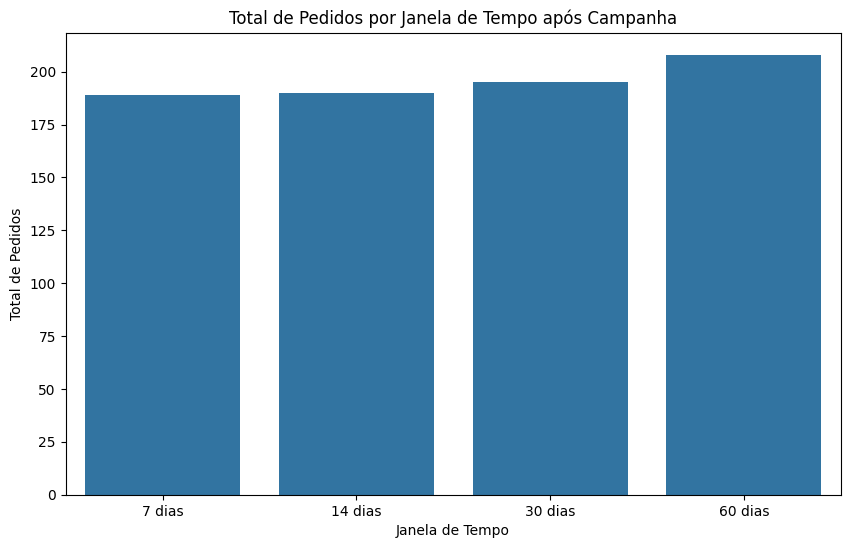

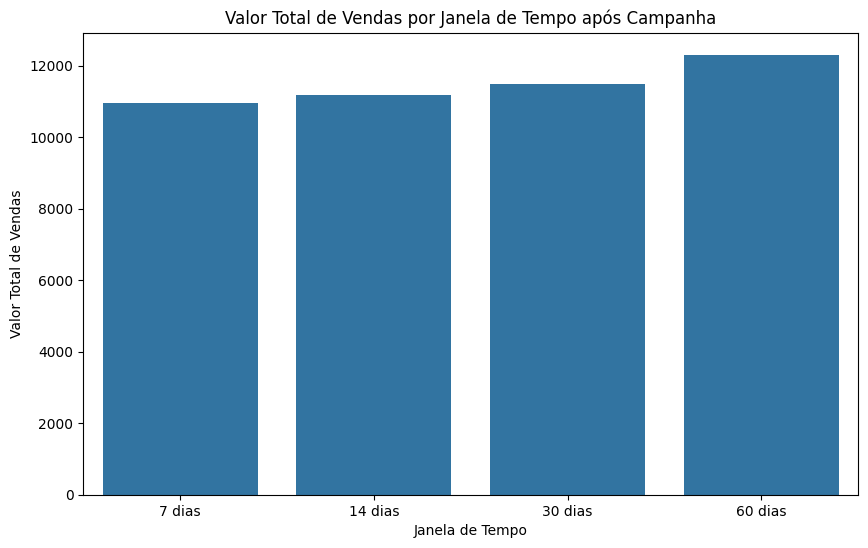

In [12]:
# Create a DataFrame to summarize the total impact for each time window
impact_summary = pd.DataFrame({
    'Janela de Tempo': ['7 dias', '14 dias', '30 dias', '60 dias'],
    'Total de Pedidos': [total_impact_7_days['total_pedidos'],
                         total_impact_14_days['total_pedidos'],
                         total_impact_30_days['total_pedidos'],
                         total_impact_60_days['total_pedidos']],
    'Valor Total de Vendas': [total_impact_7_days['valor_total_vendas'],
                              total_impact_14_days['valor_total_vendas'],
                              total_impact_30_days['valor_total_vendas'],
                              total_impact_60_days['valor_total_vendas']]
})

# Plotting Total de Pedidos by Janela de Tempo
plt.figure(figsize=(10, 6))
sns.barplot(x='Janela de Tempo', y='Total de Pedidos', data=impact_summary)
plt.title('Total de Pedidos por Janela de Tempo após Campanha')
plt.ylabel('Total de Pedidos')
plt.xlabel('Janela de Tempo')
plt.show()

# Plotting Valor Total de Vendas by Janela de Tempo
plt.figure(figsize=(10, 6))
sns.barplot(x='Janela de Tempo', y='Valor Total de Vendas', data=impact_summary)
plt.title('Valor Total de Vendas por Janela de Tempo após Campanha')
plt.ylabel('Valor Total de Vendas')
plt.xlabel('Janela de Tempo')
plt.show()

#Resumo:
##Principais Resultados da Análise de Dados

* A análise calculou o número total de pedidos e o total de vendas para cada intervalo de tempo (7, 14, 30 e 60 dias) após uma campanha, agrupados por campanha, restaurante e canal de vendas.

* O número de campanhas únicas incluídas na análise aumentou conforme o período analisado, passando de 12 campanhas únicas na janela de 7 dias para 15 campanhas na de 60 dias.

* O total de pedidos e o valor total de vendas geralmente aumentaram com a duração do intervalo de tempo.

* A análise também forneceu o número médio de pedidos e o valor médio de vendas por campanha em cada intervalo de tempo.

##Percepções ou Próximos Passos:

* A tendência de aumento no total de pedidos e vendas em períodos mais longos sugere que o impacto das campanhas se estende além dos primeiros 7 dias. Uma análise adicional poderia focar no comportamento dos clientes nesses períodos para entender retenção e compras recorrentes.

* Investigar o desempenho individual de campanhas, restaurantes e canais de venda dentro de cada intervalo pode gerar insights mais profundos sobre quais combinações são mais eficazes e onde podem ser feitas melhorias.


## Visualizando os resultados por restaurante e analisando por canal de vendas

### Subtarefa:
Gerar gráficos de impacto (pedidos e vendas) para cada restaurante e exibir a distribuição de pedidos e vendas por canal para cada restaurante e janela de tempo.

Identificados 19 restaurantes únicos com impacto nas campanhas.

--- Análise para o Restaurante ID: 3 ---


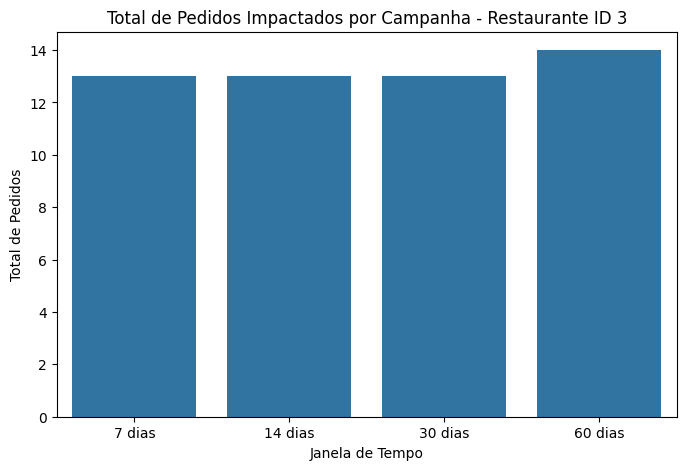

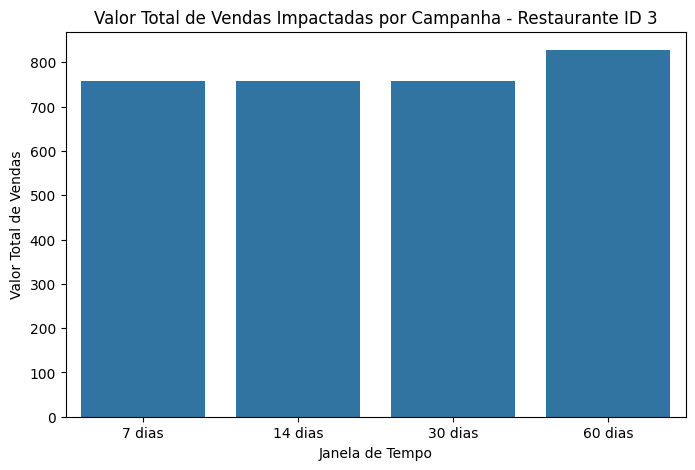


Análise de Impacto por Canal de Vendas para o Restaurante ID: 3

--- Janela de 7 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,3,230.78
ANOTAAI,3,148.84
DELIVERYVIP,1,53.16
EPADOCA,3,212.07
SITE,2,80.66
WHATSAPP,1,31.42



--- Janela de 14 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,3,230.78
ANOTAAI,3,148.84
DELIVERYVIP,1,53.16
EPADOCA,3,212.07
SITE,2,80.66
WHATSAPP,1,31.42



--- Janela de 30 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,3,230.78
ANOTAAI,3,148.84
DELIVERYVIP,1,53.16
EPADOCA,3,212.07
SITE,2,80.66
WHATSAPP,1,31.42



--- Janela de 60 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,3,230.78
ANOTAAI,3,148.84
DELIVERYVIP,1,53.16
EPADOCA,3,212.07
SITE,2,80.66
WHATSAPP,2,102.11



--- Análise para o Restaurante ID: 7 ---


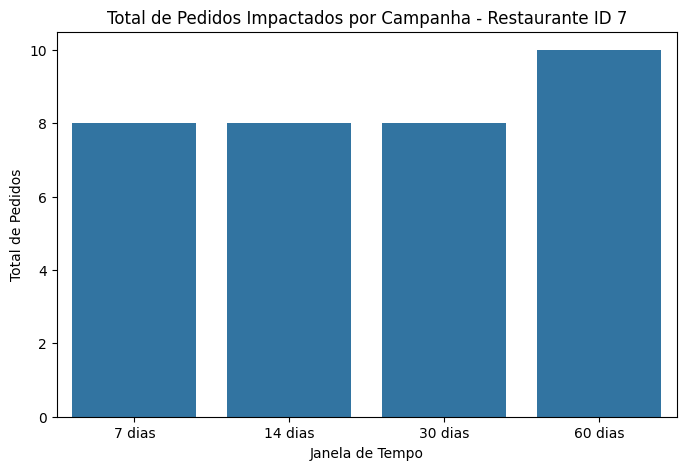

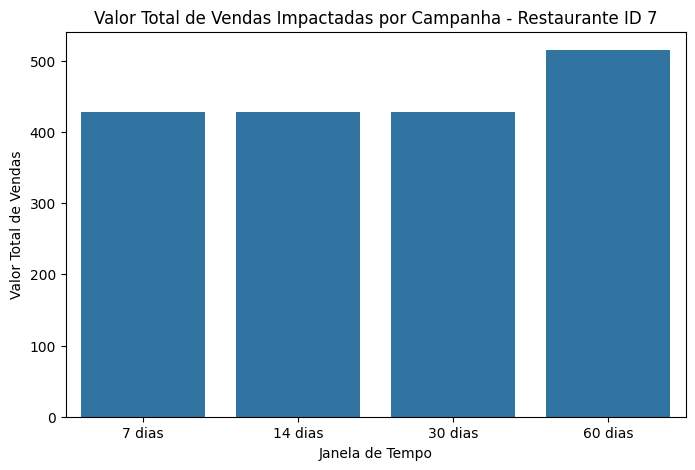


Análise de Impacto por Canal de Vendas para o Restaurante ID: 7

--- Janela de 7 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,42.12
ANOTAAI,1,103.74
DELIVERYVIP,1,33.01
IFOOD,2,102.40
SITE,1,59.69
WHATSAPP,2,86.82



--- Janela de 14 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,42.12
ANOTAAI,1,103.74
DELIVERYVIP,1,33.01
IFOOD,2,102.40
SITE,1,59.69
WHATSAPP,2,86.82



--- Janela de 30 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,42.12
ANOTAAI,1,103.74
DELIVERYVIP,1,33.01
IFOOD,2,102.40
SITE,1,59.69
WHATSAPP,2,86.82



--- Janela de 60 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,42.12
ANOTAAI,2,167.32
DELIVERYVIP,1,33.01
EPADOCA,1,23.76
IFOOD,2,102.40
SITE,1,59.69
WHATSAPP,2,86.82



--- Análise para o Restaurante ID: 12 ---


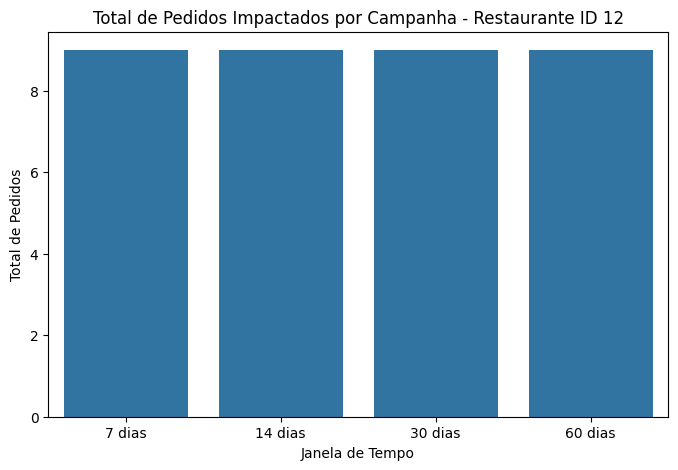

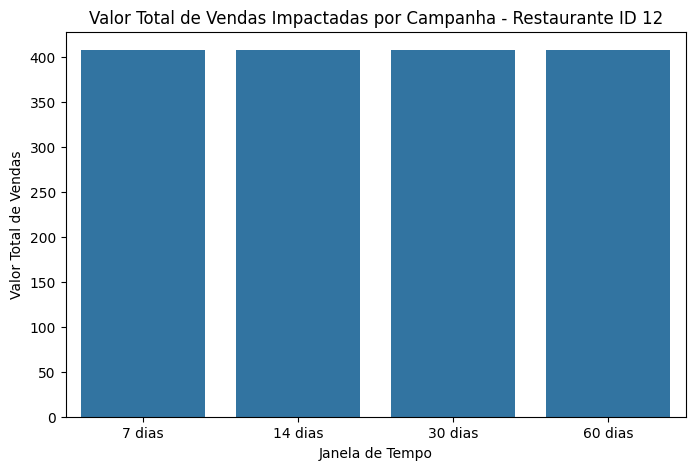


Análise de Impacto por Canal de Vendas para o Restaurante ID: 12

--- Janela de 7 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
DELIVERYVIP,1,26.93
EPADOCA,4,188.78
IFOOD,2,128.03
SITE,2,64.12



--- Janela de 14 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
DELIVERYVIP,1,26.93
EPADOCA,4,188.78
IFOOD,2,128.03
SITE,2,64.12



--- Janela de 30 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
DELIVERYVIP,1,26.93
EPADOCA,4,188.78
IFOOD,2,128.03
SITE,2,64.12



--- Janela de 60 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
DELIVERYVIP,1,26.93
EPADOCA,4,188.78
IFOOD,2,128.03
SITE,2,64.12



--- Análise para o Restaurante ID: 1 ---


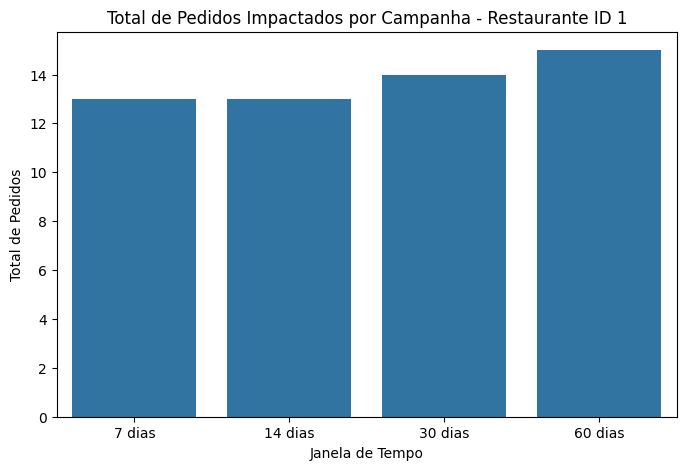

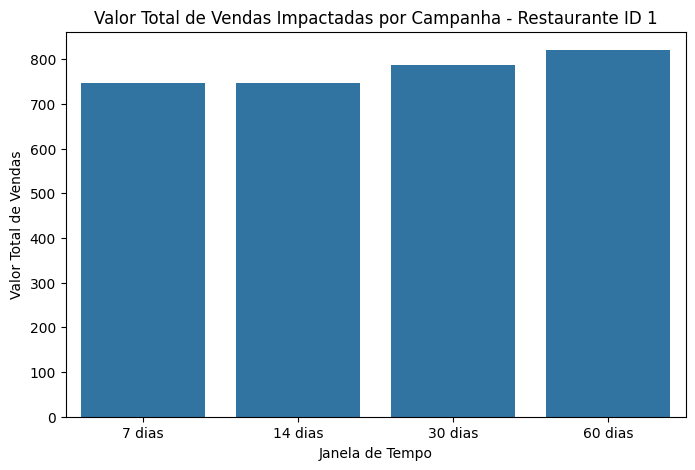


Análise de Impacto por Canal de Vendas para o Restaurante ID: 1

--- Janela de 7 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,58.98
DELIVERYVIP,1,121.66
EPADOCA,5,245.79
IFOOD,1,31.97
SITE,3,256.99
WHATSAPP,2,31.52



--- Janela de 14 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,58.98
DELIVERYVIP,1,121.66
EPADOCA,5,245.79
IFOOD,1,31.97
SITE,3,256.99
WHATSAPP,2,31.52



--- Janela de 30 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,58.98
DELIVERYVIP,1,121.66
EPADOCA,6,286.73
IFOOD,1,31.97
SITE,3,256.99
WHATSAPP,2,31.52



--- Janela de 60 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,58.98
DELIVERYVIP,1,121.66
EPADOCA,7,319.22
IFOOD,1,31.97
SITE,3,256.99
WHATSAPP,2,31.52



--- Análise para o Restaurante ID: 4 ---


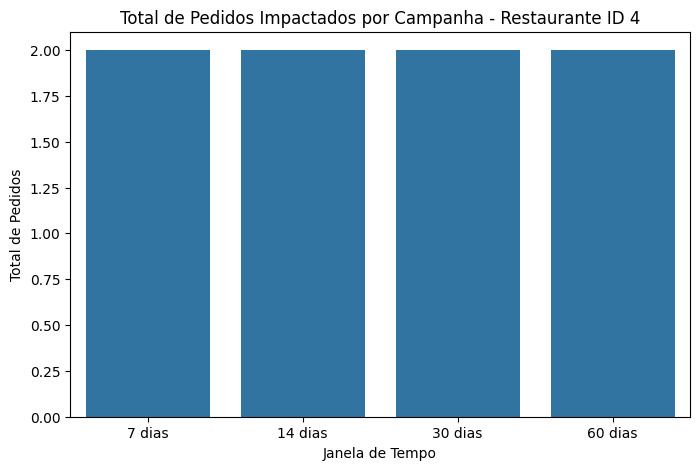

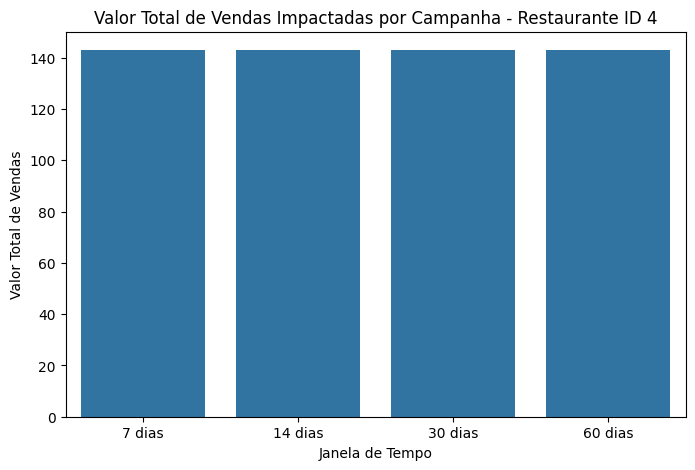


Análise de Impacto por Canal de Vendas para o Restaurante ID: 4

--- Janela de 7 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
SITE,1,64.97
WHATSAPP,1,77.99



--- Janela de 14 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
SITE,1,64.97
WHATSAPP,1,77.99



--- Janela de 30 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
SITE,1,64.97
WHATSAPP,1,77.99



--- Janela de 60 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
SITE,1,64.97
WHATSAPP,1,77.99



--- Análise para o Restaurante ID: 18 ---


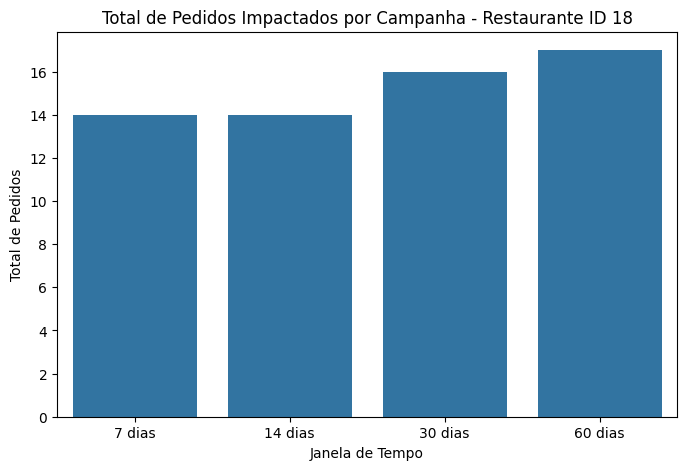

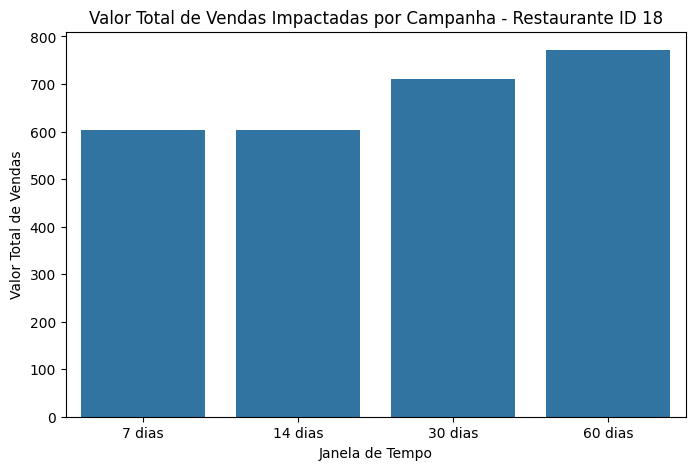


Análise de Impacto por Canal de Vendas para o Restaurante ID: 18

--- Janela de 7 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,2,59.92
ANOTAAI,3,178.44
DELIVERYVIP,1,60.38
EPADOCA,2,48.09
IFOOD,2,148.37
WHATSAPP,4,108.89



--- Janela de 14 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,2,59.92
ANOTAAI,3,178.44
DELIVERYVIP,1,60.38
EPADOCA,2,48.09
IFOOD,2,148.37
WHATSAPP,4,108.89



--- Janela de 30 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,2,59.92
ANOTAAI,3,178.44
DELIVERYVIP,2,105.44
EPADOCA,3,109.61
IFOOD,2,148.37
WHATSAPP,4,108.89



--- Janela de 60 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,2,59.92
ANOTAAI,4,239.22
DELIVERYVIP,2,105.44
EPADOCA,3,109.61
IFOOD,2,148.37
WHATSAPP,4,108.89



--- Análise para o Restaurante ID: 10 ---


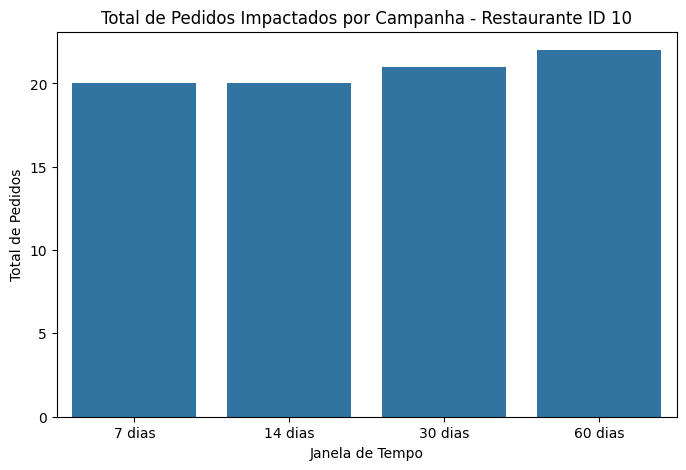

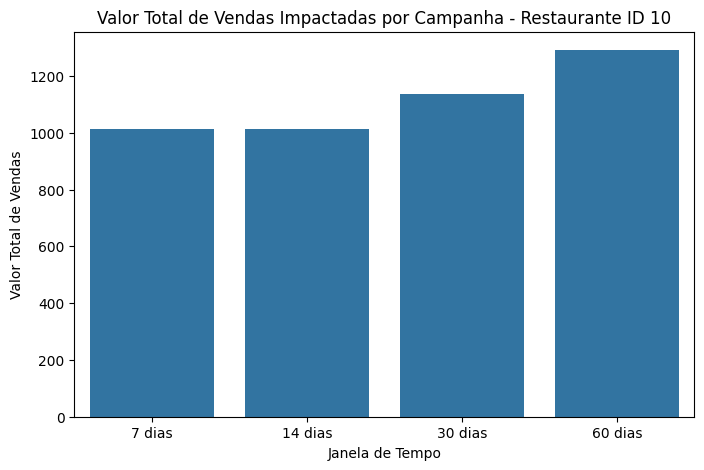


Análise de Impacto por Canal de Vendas para o Restaurante ID: 10

--- Janela de 7 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,2,96.76
ANOTAAI,2,69.94
DELIVERYVIP,5,261.61
EPADOCA,3,128.12
IFOOD,3,163.34
SITE,2,83.96
WHATSAPP,3,207.84



--- Janela de 14 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,2,96.76
ANOTAAI,2,69.94
DELIVERYVIP,5,261.61
EPADOCA,3,128.12
IFOOD,3,163.34
SITE,2,83.96
WHATSAPP,3,207.84



--- Janela de 30 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,2,96.76
ANOTAAI,2,69.94
DELIVERYVIP,6,385.21
EPADOCA,3,128.12
IFOOD,3,163.34
SITE,2,83.96
WHATSAPP,3,207.84



--- Janela de 60 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,2,96.76
ANOTAAI,2,69.94
DELIVERYVIP,7,541.25
EPADOCA,3,128.12
IFOOD,3,163.34
SITE,2,83.96
WHATSAPP,3,207.84



--- Análise para o Restaurante ID: 8 ---


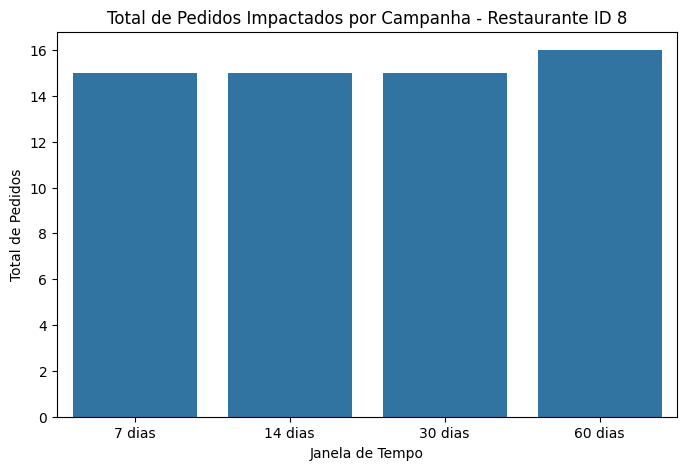

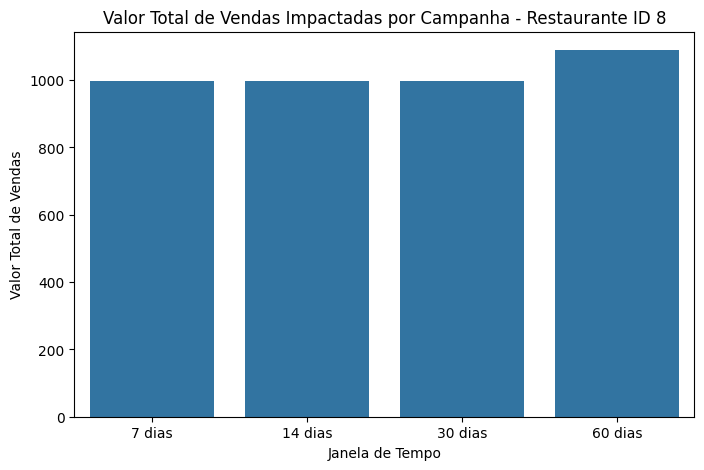


Análise de Impacto por Canal de Vendas para o Restaurante ID: 8

--- Janela de 7 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,34.53
ANOTAAI,1,83.97
DELIVERYVIP,3,117.19
EPADOCA,5,295.20
IFOOD,1,119.18
SITE,3,305.12
WHATSAPP,1,40.69



--- Janela de 14 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,34.53
ANOTAAI,1,83.97
DELIVERYVIP,3,117.19
EPADOCA,5,295.20
IFOOD,1,119.18
SITE,3,305.12
WHATSAPP,1,40.69



--- Janela de 30 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,34.53
ANOTAAI,1,83.97
DELIVERYVIP,3,117.19
EPADOCA,5,295.20
IFOOD,1,119.18
SITE,3,305.12
WHATSAPP,1,40.69



--- Janela de 60 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,34.53
ANOTAAI,1,83.97
DELIVERYVIP,3,117.19
EPADOCA,6,388.52
IFOOD,1,119.18
SITE,3,305.12
WHATSAPP,1,40.69



--- Análise para o Restaurante ID: 2 ---


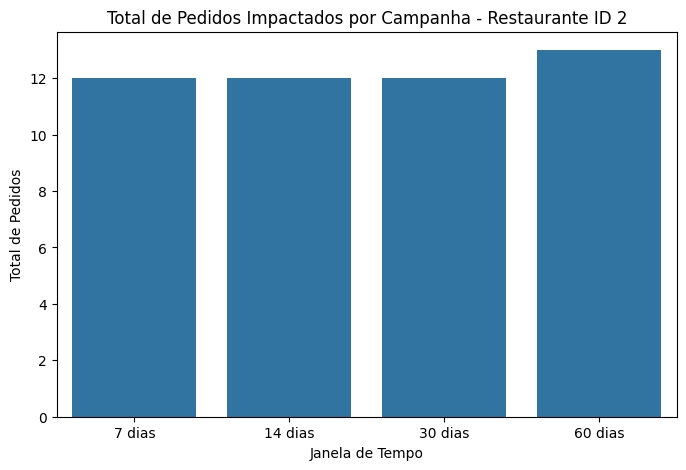

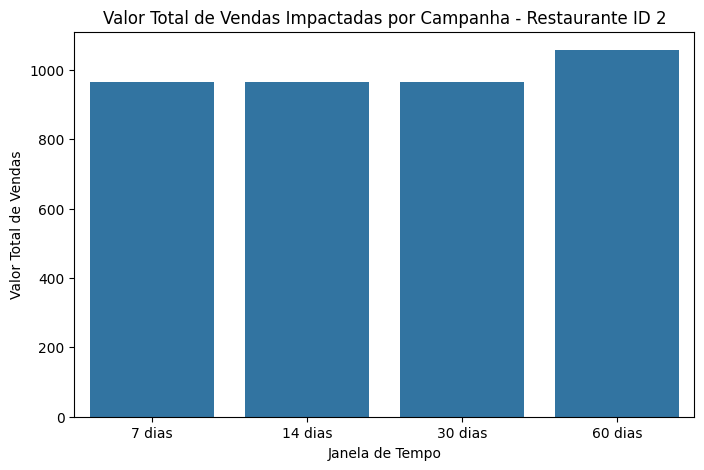


Análise de Impacto por Canal de Vendas para o Restaurante ID: 2

--- Janela de 7 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,3,198.39
ANOTAAI,2,199.56
EPADOCA,2,200.60
SITE,2,58.09
WHATSAPP,3,307.21



--- Janela de 14 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,3,198.39
ANOTAAI,2,199.56
EPADOCA,2,200.60
SITE,2,58.09
WHATSAPP,3,307.21



--- Janela de 30 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,3,198.39
ANOTAAI,2,199.56
EPADOCA,2,200.60
SITE,2,58.09
WHATSAPP,3,307.21



--- Janela de 60 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,3,198.39
ANOTAAI,2,199.56
EPADOCA,2,200.60
SITE,2,58.09
WHATSAPP,4,400.77



--- Análise para o Restaurante ID: 6 ---


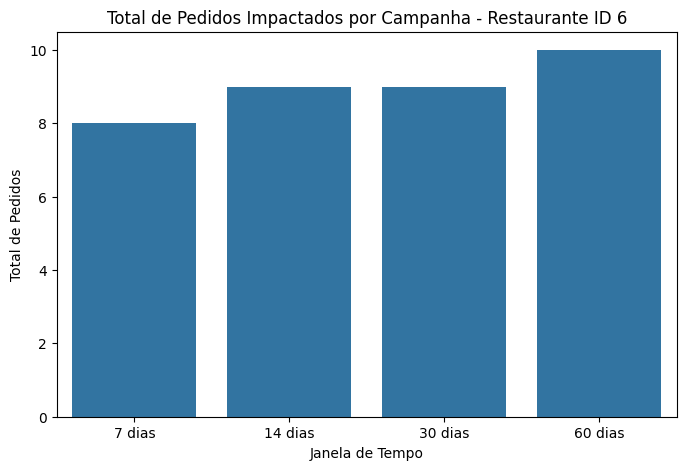

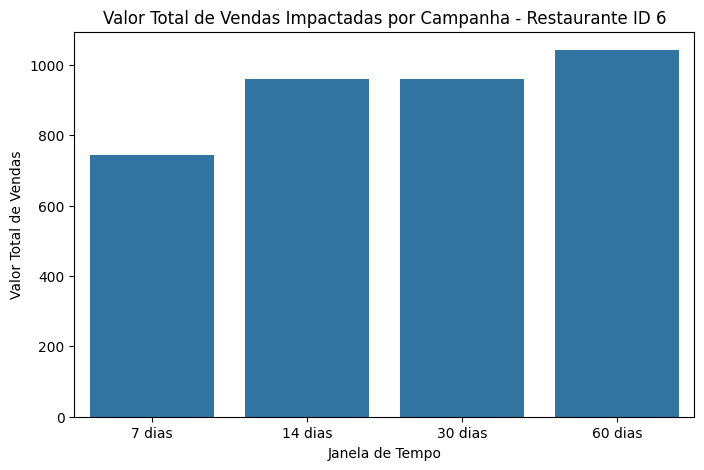


Análise de Impacto por Canal de Vendas para o Restaurante ID: 6

--- Janela de 7 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,53.93
ANOTAAI,1,153.30
DELIVERYVIP,1,215.83
IFOOD,1,35.22
SITE,1,45.90
WHATSAPP,3,239.44



--- Janela de 14 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,53.93
ANOTAAI,1,153.30
DELIVERYVIP,2,431.66
IFOOD,1,35.22
SITE,1,45.90
WHATSAPP,3,239.44



--- Janela de 30 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,53.93
ANOTAAI,1,153.30
DELIVERYVIP,2,431.66
IFOOD,1,35.22
SITE,1,45.90
WHATSAPP,3,239.44



--- Janela de 60 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,53.93
ANOTAAI,1,153.30
DELIVERYVIP,2,431.66
EPADOCA,1,83.02
IFOOD,1,35.22
SITE,1,45.90
WHATSAPP,3,239.44



--- Análise para o Restaurante ID: 9 ---


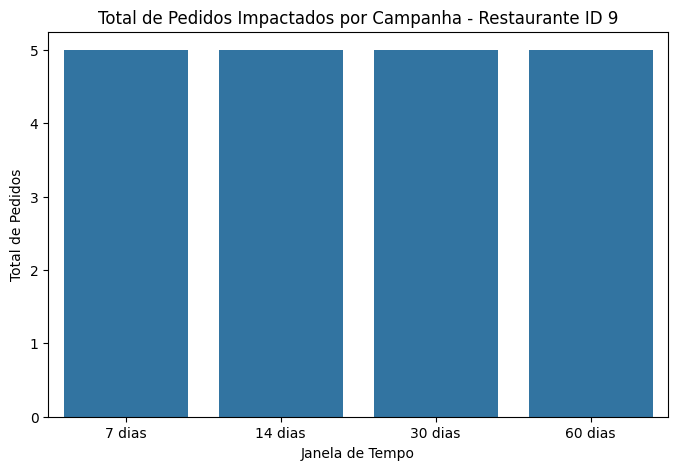

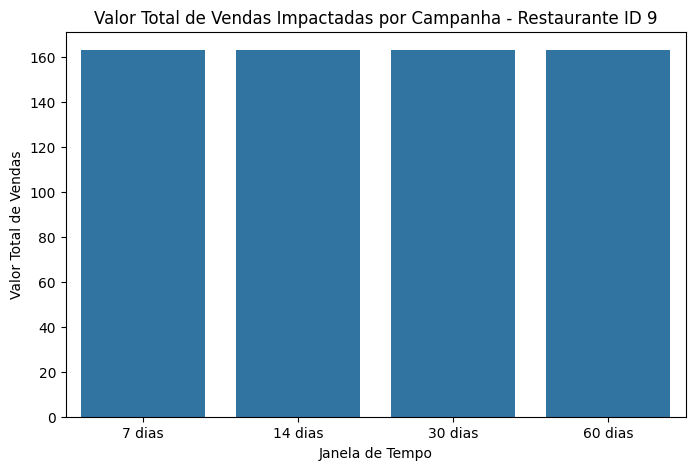


Análise de Impacto por Canal de Vendas para o Restaurante ID: 9

--- Janela de 7 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
ANOTAAI,2,89.79
DELIVERYVIP,1,20.25
EPADOCA,1,16.77
SITE,1,36.42



--- Janela de 14 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
ANOTAAI,2,89.79
DELIVERYVIP,1,20.25
EPADOCA,1,16.77
SITE,1,36.42



--- Janela de 30 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
ANOTAAI,2,89.79
DELIVERYVIP,1,20.25
EPADOCA,1,16.77
SITE,1,36.42



--- Janela de 60 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
ANOTAAI,2,89.79
DELIVERYVIP,1,20.25
EPADOCA,1,16.77
SITE,1,36.42



--- Análise para o Restaurante ID: 11 ---


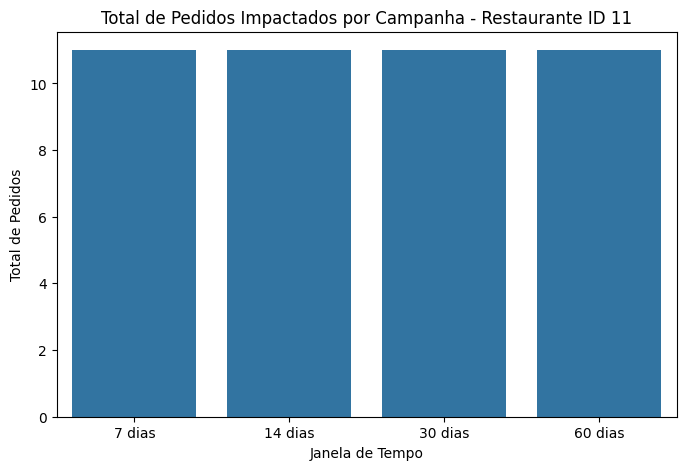

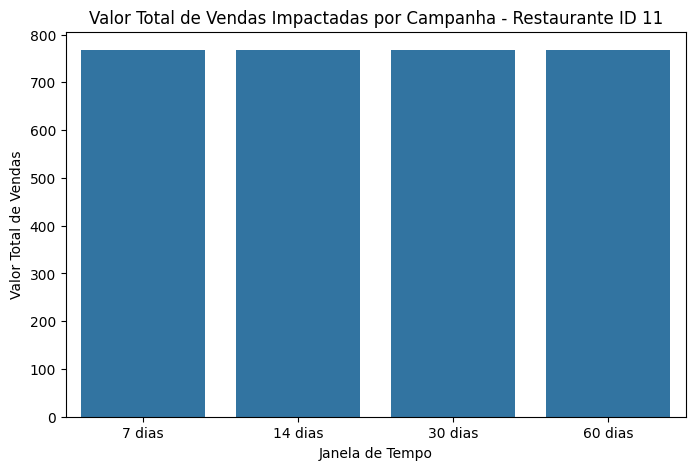


Análise de Impacto por Canal de Vendas para o Restaurante ID: 11

--- Janela de 7 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,11.65
DELIVERYVIP,2,186.37
EPADOCA,2,147.31
SITE,3,227.03
WHATSAPP,3,195.26



--- Janela de 14 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,11.65
DELIVERYVIP,2,186.37
EPADOCA,2,147.31
SITE,3,227.03
WHATSAPP,3,195.26



--- Janela de 30 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,11.65
DELIVERYVIP,2,186.37
EPADOCA,2,147.31
SITE,3,227.03
WHATSAPP,3,195.26



--- Janela de 60 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,11.65
DELIVERYVIP,2,186.37
EPADOCA,2,147.31
SITE,3,227.03
WHATSAPP,3,195.26



--- Análise para o Restaurante ID: 13 ---


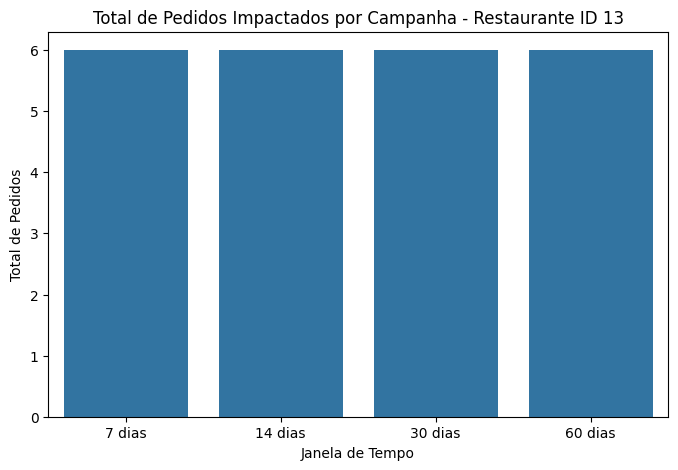

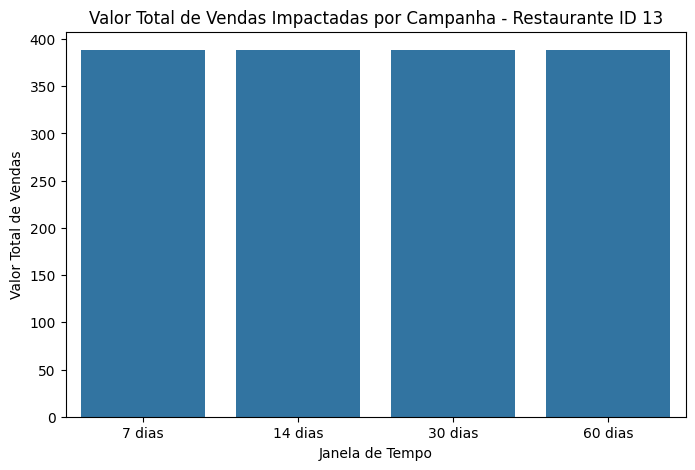


Análise de Impacto por Canal de Vendas para o Restaurante ID: 13

--- Janela de 7 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
ANOTAAI,1,27.00
EPADOCA,2,158.94
SITE,3,202.31



--- Janela de 14 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
ANOTAAI,1,27.00
EPADOCA,2,158.94
SITE,3,202.31



--- Janela de 30 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
ANOTAAI,1,27.00
EPADOCA,2,158.94
SITE,3,202.31



--- Janela de 60 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
ANOTAAI,1,27.00
EPADOCA,2,158.94
SITE,3,202.31



--- Análise para o Restaurante ID: 14 ---


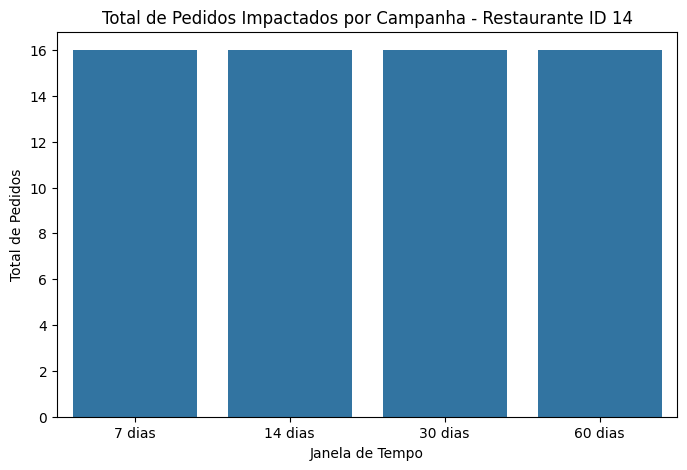

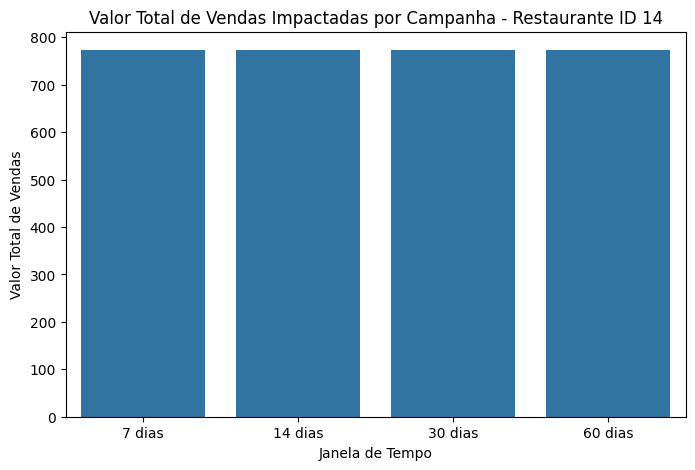


Análise de Impacto por Canal de Vendas para o Restaurante ID: 14

--- Janela de 7 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,3,123.25
ANOTAAI,2,59.36
DELIVERYVIP,4,221.90
EPADOCA,2,84.13
SITE,2,98.49
WHATSAPP,3,186.12



--- Janela de 14 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,3,123.25
ANOTAAI,2,59.36
DELIVERYVIP,4,221.90
EPADOCA,2,84.13
SITE,2,98.49
WHATSAPP,3,186.12



--- Janela de 30 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,3,123.25
ANOTAAI,2,59.36
DELIVERYVIP,4,221.90
EPADOCA,2,84.13
SITE,2,98.49
WHATSAPP,3,186.12



--- Janela de 60 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,3,123.25
ANOTAAI,2,59.36
DELIVERYVIP,4,221.90
EPADOCA,2,84.13
SITE,2,98.49
WHATSAPP,3,186.12



--- Análise para o Restaurante ID: 15 ---


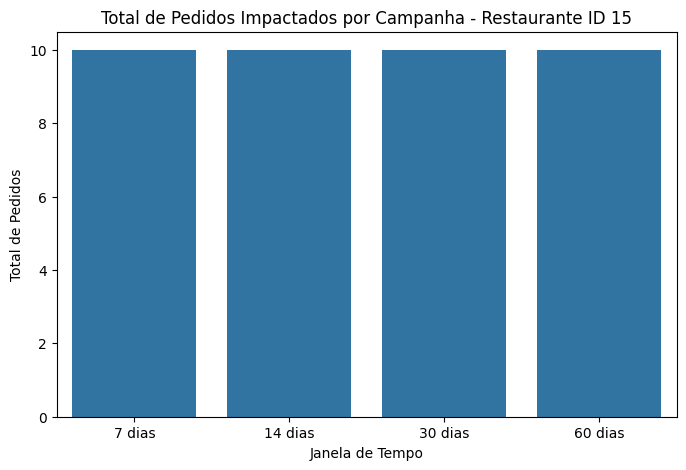

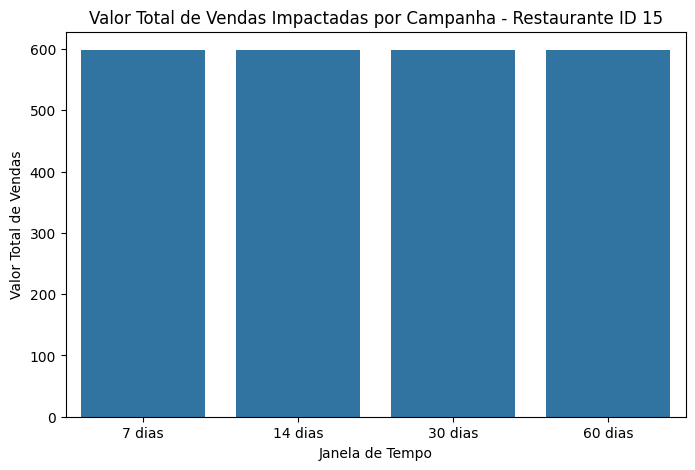


Análise de Impacto por Canal de Vendas para o Restaurante ID: 15

--- Janela de 7 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,95.28
DELIVERYVIP,3,137.62
EPADOCA,2,183.13
SITE,1,77.22
WHATSAPP,3,105.19



--- Janela de 14 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,95.28
DELIVERYVIP,3,137.62
EPADOCA,2,183.13
SITE,1,77.22
WHATSAPP,3,105.19



--- Janela de 30 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,95.28
DELIVERYVIP,3,137.62
EPADOCA,2,183.13
SITE,1,77.22
WHATSAPP,3,105.19



--- Janela de 60 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,95.28
DELIVERYVIP,3,137.62
EPADOCA,2,183.13
SITE,1,77.22
WHATSAPP,3,105.19



--- Análise para o Restaurante ID: 16 ---


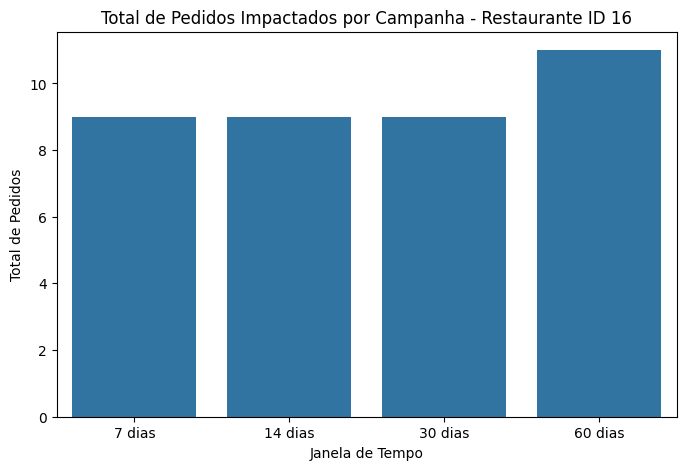

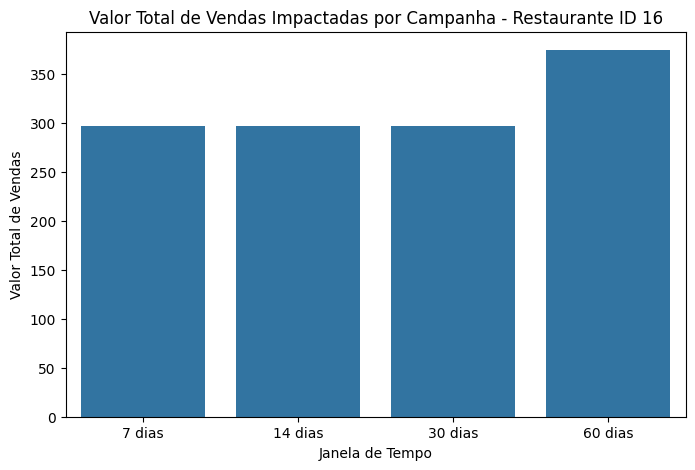


Análise de Impacto por Canal de Vendas para o Restaurante ID: 16

--- Janela de 7 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,29.30
EPADOCA,3,86.57
IFOOD,3,80.30
SITE,2,100.86



--- Janela de 14 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,29.30
EPADOCA,3,86.57
IFOOD,3,80.30
SITE,2,100.86



--- Janela de 30 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,29.30
EPADOCA,3,86.57
IFOOD,3,80.30
SITE,2,100.86



--- Janela de 60 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,29.30
EPADOCA,4,140.68
IFOOD,4,103.60
SITE,2,100.86



--- Análise para o Restaurante ID: 17 ---


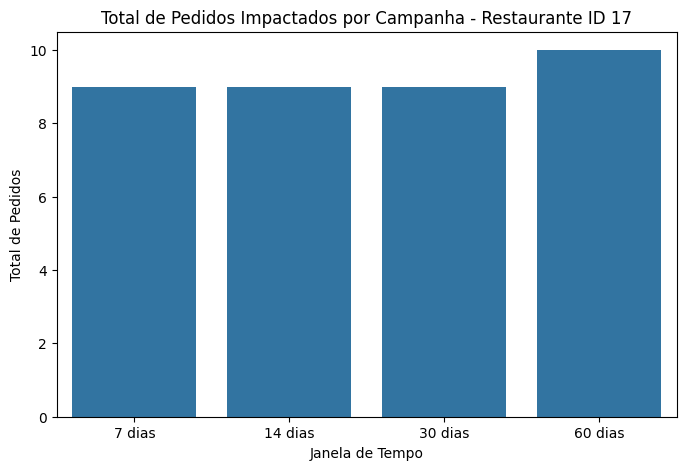

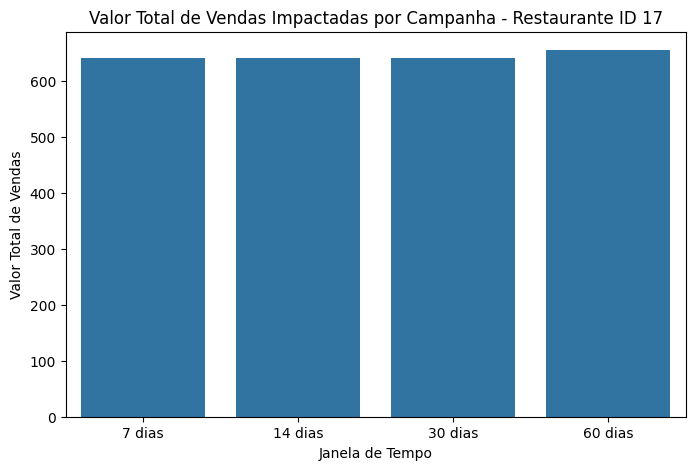


Análise de Impacto por Canal de Vendas para o Restaurante ID: 17

--- Janela de 7 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,2,102.15
ANOTAAI,1,54.89
DELIVERYVIP,1,53.45
EPADOCA,2,193.16
IFOOD,1,58.03
SITE,2,179.55



--- Janela de 14 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,2,102.15
ANOTAAI,1,54.89
DELIVERYVIP,1,53.45
EPADOCA,2,193.16
IFOOD,1,58.03
SITE,2,179.55



--- Janela de 30 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,2,102.15
ANOTAAI,1,54.89
DELIVERYVIP,1,53.45
EPADOCA,2,193.16
IFOOD,1,58.03
SITE,2,179.55



--- Janela de 60 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,2,102.15
ANOTAAI,2,68.54
DELIVERYVIP,1,53.45
EPADOCA,2,193.16
IFOOD,1,58.03
SITE,2,179.55



--- Análise para o Restaurante ID: 19 ---


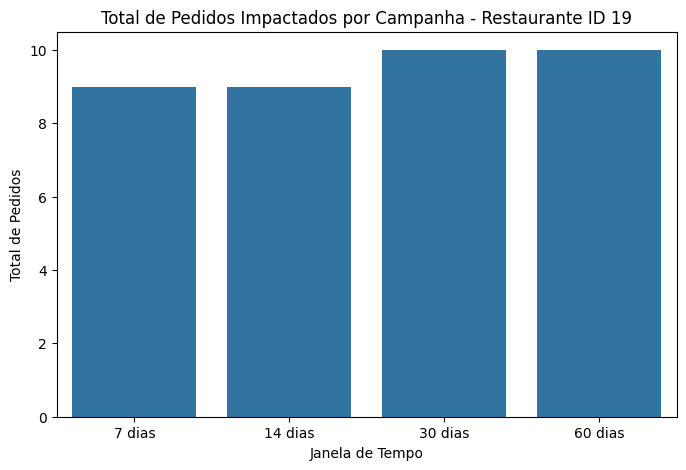

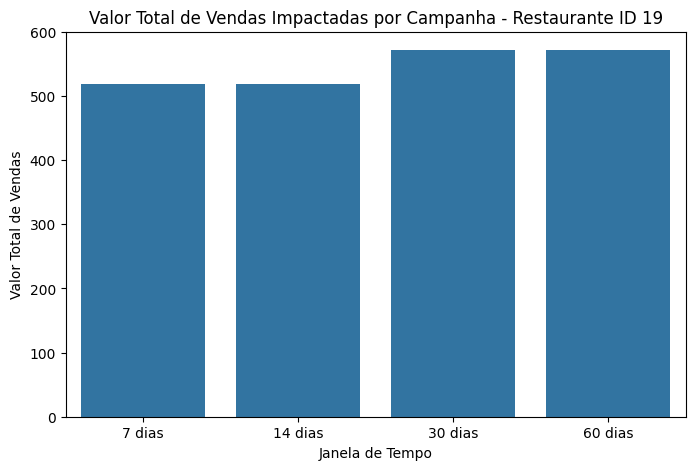


Análise de Impacto por Canal de Vendas para o Restaurante ID: 19

--- Janela de 7 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,21.58
ANOTAAI,2,130.05
IFOOD,3,155.36
SITE,1,24.01
WHATSAPP,2,187.65



--- Janela de 14 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,21.58
ANOTAAI,2,130.05
IFOOD,3,155.36
SITE,1,24.01
WHATSAPP,2,187.65



--- Janela de 30 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,21.58
ANOTAAI,2,130.05
IFOOD,3,155.36
SITE,1,24.01
WHATSAPP,3,240.72



--- Janela de 60 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
99FOOD,1,21.58
ANOTAAI,2,130.05
IFOOD,3,155.36
SITE,1,24.01
WHATSAPP,3,240.72



--- Análise para o Restaurante ID: 5 ---


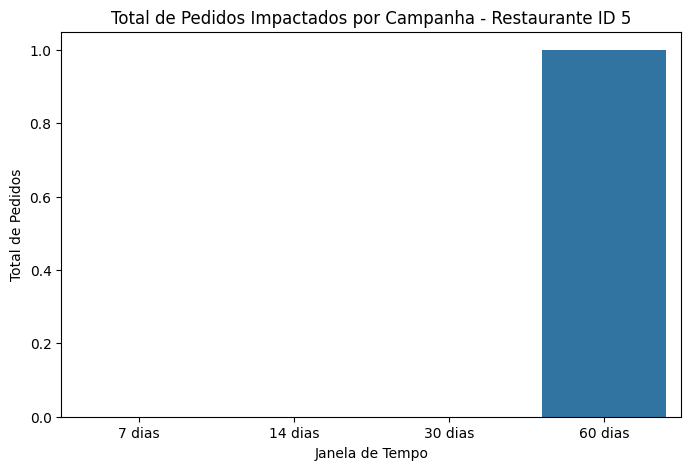

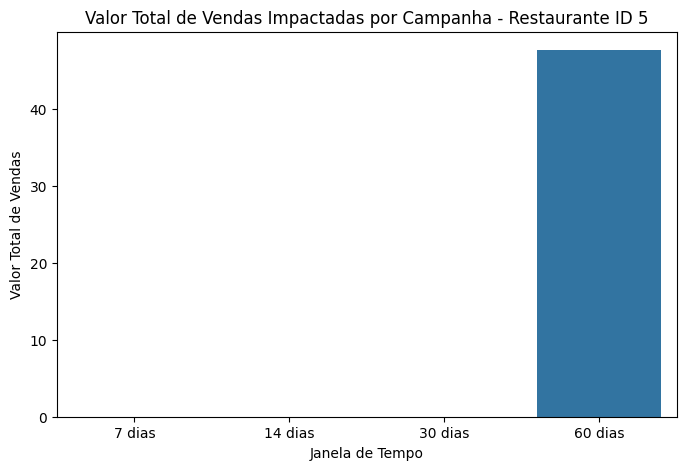


Análise de Impacto por Canal de Vendas para o Restaurante ID: 5

--- Janela de 7 dias: Sem dados de impacto por canal de vendas ---

--- Janela de 14 dias: Sem dados de impacto por canal de vendas ---

--- Janela de 30 dias: Sem dados de impacto por canal de vendas ---

--- Janela de 60 dias ---


,total_pedidos,valor_total_vendas
salesChannel,,
IFOOD,1,47.59



Análise por restaurante concluída.


In [13]:
# Identificar restaurantes únicos nos DataFrames de impacto
unique_restaurants_7 = impact_7_days['id_restaurante'].unique()
unique_restaurants_14 = impact_14_days['id_restaurante'].unique()
unique_restaurants_30 = impact_30_days['id_restaurante'].unique()
unique_restaurants_60 = impact_60_days['id_restaurante'].unique()

# Combinar listas de restaurantes únicos de todas as janelas
all_unique_restaurants = pd.Series(
    list(unique_restaurants_7) +
    list(unique_restaurants_14) +
    list(unique_restaurants_30) +
    list(unique_restaurants_60)
).unique()

print(f"Identificados {len(all_unique_restaurants)} restaurantes únicos com impacto nas campanhas.")


# Iterar por cada restaurante único
for restaurant_id in all_unique_restaurants:
    print(f"\n--- Análise para o Restaurante ID: {int(restaurant_id)} ---")

    # Filtrar dados de impacto para o restaurante atual em cada janela de tempo
    impact_7_rest = impact_7_days[impact_7_days['id_restaurante'] == restaurant_id].copy()
    impact_14_rest = impact_14_days[impact_14_days['id_restaurante'] == restaurant_id].copy()
    impact_30_rest = impact_30_days[impact_30_days['id_restaurante'] == restaurant_id].copy()
    impact_60_rest = impact_60_days[impact_60_days['id_restaurante'] == restaurant_id].copy()

    # Preparar dados para visualização (combinar janelas de tempo)
    # Criar DataFrames temporários para cada janela com a coluna 'Janela de Tempo'
    impact_7_rest['Janela de Tempo'] = '7 dias'
    impact_14_rest['Janela de Tempo'] = '14 dias'
    impact_30_rest['Janela de Tempo'] = '30 dias'
    impact_60_rest['Janela de Tempo'] = '60 dias'

    # Concatenar os DataFrames de impacto para o restaurante atual
    impact_rest_combined = pd.concat([impact_7_rest, impact_14_rest, impact_30_rest, impact_60_rest], ignore_index=True)

    # Remover colunas salesChannel e campaignId para o gráfico agregado por janela
    impact_rest_aggregated = impact_rest_combined.groupby('Janela de Tempo').agg(
        total_pedidos=('total_pedidos', 'sum'),
        valor_total_vendas=('valor_total_vendas', 'sum')
    ).reset_index()

    # Garantir a ordem correta das janelas de tempo para o gráfico
    impact_rest_aggregated['Janela de Tempo'] = pd.Categorical(
        impact_rest_aggregated['Janela de Tempo'],
        categories=['7 dias', '14 dias', '30 dias', '60 dias'],
        ordered=True
    )
    impact_rest_aggregated = impact_rest_aggregated.sort_values('Janela de Tempo')


    # --- Criar Gráficos de Pedidos por Janela de Tempo para o Restaurante ---
    if not impact_rest_aggregated.empty:
        plt.figure(figsize=(8, 5))
        sns.barplot(x='Janela de Tempo', y='total_pedidos', data=impact_rest_aggregated)
        plt.title(f'Total de Pedidos Impactados por Campanha - Restaurante ID {int(restaurant_id)}')
        plt.ylabel('Total de Pedidos')
        plt.xlabel('Janela de Tempo')
        plt.show()

        # --- Criar Gráficos de Vendas por Janela de Tempo para o Restaurante ---
        plt.figure(figsize=(8, 5))
        sns.barplot(x='Janela de Tempo', y='valor_total_vendas', data=impact_rest_aggregated)
        plt.title(f'Valor Total de Vendas Impactadas por Campanha - Restaurante ID {int(restaurant_id)}')
        plt.ylabel('Valor Total de Vendas')
        plt.xlabel('Janela de Tempo')
        plt.show()
    else:
        print(f"Não há dados de impacto para gráficos para o Restaurante ID: {int(restaurant_id)}")


    # --- Analisar Impacto por Canal de Vendas para o Restaurante e Janela ---
    print(f"\nAnálise de Impacto por Canal de Vendas para o Restaurante ID: {int(restaurant_id)}")

    if not impact_7_rest.empty:
        print("\n--- Janela de 7 dias ---")
        display(impact_7_rest.groupby('salesChannel').agg(
            total_pedidos=('total_pedidos', 'sum'),
            valor_total_vendas=('valor_total_vendas', 'sum')
        ))
    else:
        print("\n--- Janela de 7 dias: Sem dados de impacto por canal de vendas ---")

    if not impact_14_rest.empty:
        print("\n--- Janela de 14 dias ---")
        display(impact_14_rest.groupby('salesChannel').agg(
            total_pedidos=('total_pedidos', 'sum'),
            valor_total_vendas=('valor_total_vendas', 'sum')
        ))
    else:
         print("\n--- Janela de 14 dias: Sem dados de impacto por canal de vendas ---")


    if not impact_30_rest.empty:
        print("\n--- Janela de 30 dias ---")
        display(impact_30_rest.groupby('salesChannel').agg(
            total_pedidos=('total_pedidos', 'sum'),
            valor_total_vendas=('valor_total_vendas', 'sum')
        ))
    else:
        print("\n--- Janela de 30 dias: Sem dados de impacto por canal de vendas ---")


    if not impact_60_rest.empty:
        print("\n--- Janela de 60 dias ---")
        display(impact_60_rest.groupby('salesChannel').agg(
            total_pedidos=('total_pedidos', 'sum'),
            valor_total_vendas=('valor_total_vendas', 'sum')
        ))
    else:
        print("\n--- Janela de 60 dias: Sem dados de impacto por canal de vendas ---")

print("\nAnálise por restaurante concluída.")